In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
plt.style.use(mplhep.style.CMS)

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

save_figures = False

{'muon': {'2017B': 2.360904801, '2017C1': 5.313012839, '2017C2': 3.264135878, '2017D': 4.074723964, '2017E': 8.958810514, '2017F1': 1.708478656, '2017F2': 7.877903151, '2017F3': 3.632463163}, 'electron': {'2017B': 2.259685729466727, '2017C1': 5.070112518026598, '2017C2': 3.114906113929596, '2017D': 3.8868791892596004, '2017E': 8.568260128452684, '2017F1': 1.629432474022848, '2017F2': 7.513416205912684, '2017F3': 3.4643999898374793}}
Luminosity 2017 muon: 37.190432966
Luminosity 2017 electron: 35.507092348908216
{'muon': {'2018A': 12.0989473, '2018B1': 6.37152736, '2018B2': 0.3994688, '2018C': 6.5296412326999995, '2018D1': 19.858430199999997, '2018D2': 10.404398965499999}, 'electron': {'2018A': 11.290304299999999, '2018B1': 6.37985326, '2018B2': 0.39999080000000004, '2018C': 6.529556346600001, '2018D1': 19.86785332, '2018D2': 10.409336007299999}}
Luminosity 2018 muon: 55.662413858200004
Luminosity 2018 electron: 54.8768940339


In [3]:
help( process_data_protons_multiRP )

Help on function process_data_protons_multiRP in module processing:

process_data_protons_multiRP(lepton_type, data_sample, df_protons_multiRP, df_ppstracks=None, apply_fiducial=True, within_aperture=False, random_protons=False, mix_protons=False, select_2protons=True, runOnMC=False, use_hash_index=False)



In [ ]:
# def get_data( fileNames ):
    
#     df_protons_multiRP_list = []
#     df_protons_singleRP_list = []
#     df_ppstracks_list = []
#     df_counts_list = []

#     for file_ in fileNames:
#         print ( file_ )
#         with h5py.File( file_, 'r' ) as f:
#             print ( list(f.keys()) )

#             dset_protons_multiRP = f['protons_multiRP']
#             print ( dset_protons_multiRP.shape )
#             print ( dset_protons_multiRP[:,:] )

#             dset_protons_singleRP = f['protons_singleRP']
#             print ( dset_protons_singleRP.shape )
#             print ( dset_protons_singleRP[:,:] )

#             dset_ppstracks = f['ppstracks']
#             print ( dset_ppstracks.shape )
#             print ( dset_ppstracks[:,:] )

#             dset_columns_protons = f['columns_protons']
#             print ( dset_columns_protons.shape )
#             columns_protons = list( dset_columns_protons )
#             print ( columns_protons )
#             columns_protons_str = [ item.decode("utf-8") for item in columns_protons ]
#             print ( columns_protons_str )

#             dset_columns_ppstracks = f['columns_ppstracks']
#             print ( dset_columns_ppstracks.shape )
#             columns_ppstracks = list( dset_columns_ppstracks )
#             print ( columns_ppstracks )
#             columns_ppstracks_str = [ item.decode("utf-8") for item in columns_ppstracks ]
#             print ( columns_ppstracks_str )

#             dset_selections = f['selections']
#             selections_ = [ item.decode("utf-8") for item in dset_selections ]
#             print ( selections_ )

#             dset_counts = f['event_counts']
#             df_counts_list.append( pd.Series( dset_counts, index=selections_ ) )
#             print ( df_counts_list[-1] )

#             chunk_size = 1000000
#             entries_protons_multiRP = dset_protons_multiRP.shape[0]
#             start_ = list( range( 0, entries_protons_multiRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_multiRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_multiRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_multiRP_list.append( df_ )
#                 print ( df_protons_multiRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_multiRP_list[-1] ) ) )

#             entries_protons_singleRP = dset_protons_singleRP.shape[0]
#             start_ = list( range( 0, entries_protons_singleRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_singleRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_singleRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_singleRP_list.append( df_ )
#                 print ( df_protons_singleRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_singleRP_list[-1] ) ) )

#             entries_ppstracks = dset_ppstracks.shape[0]
#             start_ = list( range( 0, entries_ppstracks, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_ppstracks )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_ppstracks[ start_[idx] : stop_[idx] ], columns=columns_ppstracks_str ).astype( { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "rpid": "int32" } )
#                 df_ppstracks_list.append( df_ )
#                 print ( df_ppstracks_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_ppstracks_list[-1] ) ) )

#     df_counts = df_counts_list[0]
#     for idx in range( 1, len( df_counts_list ) ):
#         df_counts = df_counts.add( df_counts_list[idx] )
#     print ( df_counts )

#     df_protons_multiRP = pd.concat( df_protons_multiRP_list )
#     print (df_protons_multiRP)

#     df_protons_singleRP = pd.concat( df_protons_singleRP_list )
#     print (df_protons_singleRP)

#     df_ppstracks = pd.concat( df_ppstracks_list )
#     print (df_ppstracks)
    
#     return (df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks)

In [ ]:
# run_ranges_periods = {}
# run_ranges_periods[ "2017B" ]  = (297020,299329)
# run_ranges_periods[ "2017C1" ] = (299337,300785)
# run_ranges_periods[ "2017C2" ] = (300806,302029)
# run_ranges_periods[ "2017D" ]  = (302030,303434)
# run_ranges_periods[ "2017E" ]  = (303435,304826)
# run_ranges_periods[ "2017F1" ] = (304911,305114)
# run_ranges_periods[ "2017F2" ] = (305178,305902)
# run_ranges_periods[ "2017F3" ] = (305965,306462)
# df_run_ranges = pd.DataFrame( run_ranges_periods, index=("min","max") ).transpose()

# aperture_period_map = {
#     "2016_preTS2"  : "2016_preTS2",
#     "2016_postTS2" : "2016_postTS2",
#     "2017B"        : "2017_preTS2",
#     "2017C1"       : "2017_preTS2",
#     "2017C2"       : "2017_preTS2",
#     "2017D"        : "2017_preTS2",
#     "2017E"        : "2017_postTS2",
#     "2017F1"       : "2017_postTS2",
#     "2017F2"       : "2017_postTS2",
#     "2017F3"       : "2017_postTS2",
#     "2018"         : "2018"
# }

In [ ]:
# # Per data period, arm=(0,1)
# # Periods: "2016_preTS2", "2016_postTS2", "2017_preTS2", "2017_postTS2", "2018"
# def aperture_parametrisation( period, arm, xangle, xi ):

#     #https://github.com/cms-sw/cmssw/tree/916cb3d20213734a0465240720c8c8c392b92eac/Validation/CTPPS/python/simu_config

#     if (period == "2016_preTS2"):
#         if   (arm == 0): return 3.76296E-05+((xi<0.117122)*0.00712775+(xi>=0.117122)*0.0148651)*(xi-0.117122);
#         elif (arm == 1): return 1.85954E-05+((xi<0.14324)*0.00475349+(xi>=0.14324)*0.00629514)*(xi-0.14324);
#     elif (period == "2016_postTS2"):
#         if   (arm == 0): return 6.10374E-05+((xi<0.113491)*0.00795942+(xi>=0.113491)*0.01935)*(xi-0.113491);
#         elif (arm == 1): return (xi-0.110)/130.0;
#     elif (period == "2017_preTS2"):
#         if   (arm == 0): return -(8.71198E-07*xangle-0.000134726)+((xi<(0.000264704*xangle+0.081951))*-(4.32065E-05*xangle-0.0130746)+(xi>=(0.000264704*xangle+0.081951))*-(0.000183472*xangle-0.0395241))*(xi-(0.000264704*xangle+0.081951));
#         elif (arm == 1): return 3.43116E-05+((xi<(0.000626936*xangle+0.061324))*0.00654394+(xi>=(0.000626936*xangle+0.061324))*-(0.000145164*xangle-0.0272919))*(xi-(0.000626936*xangle+0.061324));
#     elif (period == "2017_postTS2"):
#         if   (arm == 0): return -(8.92079E-07*xangle-0.000150214)+((xi<(0.000278622*xangle+0.0964383))*-(3.9541e-05*xangle-0.0115104)+(xi>=(0.000278622*xangle+0.0964383))*-(0.000108249*xangle-0.0249303))*(xi-(0.000278622*xangle+0.0964383));
#         elif (arm == 1): return 4.56961E-05+((xi<(0.00075625*xangle+0.0643361))*-(3.01107e-05*xangle-0.00985126)+(xi>=(0.00075625*xangle+0.0643361))*-(8.95437e-05*xangle-0.0169474))*(xi-(0.00075625*xangle+0.0643361));
#     elif (period == "2018"):
#         if   (arm == 0): return -(8.44219E-07*xangle-0.000100957)+((xi<(0.000247185*xangle+0.101599))*-(1.40289E-05*xangle-0.00727237)+(xi>=(0.000247185*xangle+0.101599))*-(0.000107811*xangle-0.0261867))*(xi-(0.000247185*xangle+0.101599));
#         elif (arm == 1): return -(-4.74758E-07*xangle+3.0881E-05)+((xi<(0.000727859*xangle+0.0722653))*-(2.43968E-05*xangle-0.0085461)+(xi>=(0.000727859*xangle+0.0722653))*-(7.19216E-05*xangle-0.0148267))*(xi-(0.000727859*xangle+0.0722653));
#     else:
#         return -999.

# def check_aperture( period, arm, xangle, xi, theta_x ):
#     return ( theta_x < -aperture_parametrisation( period, arm, xangle, xi ) )

In [ ]:
# def process_data_protons_multiRP( df_protons_multiRP, df_ppstracks=None, runOnMC=False ):

#     if not runOnMC:
#         df_protons_multiRP.loc[ :, "period" ] = np.nan
#         for idx_ in range( df_run_ranges.shape[0] ):
#             msk_period_ = ( ( df_protons_multiRP.loc[ :, "run" ] >= df_run_ranges.iloc[ idx_ ][ "min" ] ) & ( df_protons_multiRP.loc[ :, "run" ] <= df_run_ranges.iloc[ idx_ ][ "max" ] ) )
#             sum_period_ = np.sum( msk_period_ )
#             if sum_period_ > 0:
#                 period_key_ = df_run_ranges.index[ idx_ ]
#                 df_protons_multiRP.loc[ :, "period" ].loc[ msk_period_ ] = period_key_
#                 print ( "{}: {}".format( period_key_, sum_period_ ) )

#         df_protons_multiRP.loc[ :, "within_aperture" ] = df_protons_multiRP.apply(
#                 lambda row: check_aperture( aperture_period_map[ row["period"] ], row["arm"], 120., row["xi"], row["thx"] ), # FIXME
#                 axis=1
#                 )
    
#     df_protons_multiRP_index = df_protons_multiRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )

#     df_ppstracks_index = None
#     if not df_ppstracks is None:
#         df_ppstracks_index = df_ppstracks.set_index( ['run', 'lumiblock', 'event', 'slice'] )
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_x2" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y2" ] = np.nan
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]

#     df_protons_multiRP_events = df_protons_multiRP_index.drop( columns=[ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm" ] )
#     df_protons_multiRP_events = df_protons_multiRP_events[ ~df_protons_multiRP_events.index.duplicated(keep='first') ]

#     df_protons_multiRP_events.loc[ :, "MX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 13000. * np.sqrt( df_.iloc[0].xi * df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "YX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 0.5 * np.log( df_.iloc[0].xi / df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "diffMWW_MX" ]  = df_protons_multiRP_events[ "recoMWW" ] - df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "ratioMWW_MX" ] = df_protons_multiRP_events[ "recoMWW" ] / df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "shiftedRatioMWW_MX" ] = df_protons_multiRP_events[ "ratioMWW_MX" ] - 1.
#     df_protons_multiRP_events.loc[ :, "diffYWW_YX" ]  = df_protons_multiRP_events[ "recoRapidityWW" ] - df_protons_multiRP_events[ "YX" ]
    
#     return (df_protons_multiRP_index, df_protons_multiRP_events, df_ppstracks_index)

### Signal

In [ ]:
# run_tables = False

# # labels_signals = [ "GGToWW-AQGC-A0W1e-6" ]
# labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]

# fileNames_signals = {
#     "GGToWW-AQGC-A0W1e-6": [ "output-GGToWW-AQGC-A0W1e-6.h5" ],
#     "GGToWW-AQGC-A0W2e-6": [ "output-GGToWW-AQGC-A0W2e-6.h5" ],
#     "GGToWW-AQGC-A0W5e-6": [ "output-GGToWW-AQGC-A0W5e-6.h5" ]
#     }

# df_counts_signals = {}
# df_signals_protons_multiRP_index = {}
# df_signals_protons_multiRP_events = {}

# for label_ in labels_signals:
#     import time
#     print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
#     time_s_ = time.time()

#     #df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = 4 * [None]
#     #df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = 3 * [None]

#     if run_tables:
#         with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), complevel=5 ) as store_:

#             df_counts_signal_, df_protons_multiRP_signal_, df_protons_singleRP_signal_, df_ppstracks_signal_ = get_data( fileNames_signals[ label_ ] )
#             df_protons_multiRP_signal_index_, df_protons_multiRP_signal_events_, df_ppstracks_signal_index_ = process_data_protons_multiRP( df_protons_multiRP_signal_, df_ppstracks_signal_, apply_fiducial=True, within_aperture=True, select_2protons=False, runOnMC=True )

#             store_[ "counts" ] = df_counts_signal_
#             store_[ "protons_multiRP"] = df_protons_multiRP_signal_index_
#             store_[ "events_multiRP" ] = df_protons_multiRP_signal_events_
    
#     with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
#         df_counts_signals[ label_ ] = store_[ "counts" ]
#         df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
#         df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

#     time_e_ = time.time()
#     print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [ ]:
# for label_ in labels_signals:
#     with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
#         print ( list( store_ ) )

In [4]:
# labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]
labels_signals = [ "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}
base_path_ = 'output'
# base_path_ = 'output/save-V5'
for label_ in labels_signals:
    print ( label_ )
    file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        df_counts_signals[ label_ ] = store_[ "counts" ]
        df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
        df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-2018-muon-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [34]:
# label_ = "GGToWW-AQGC-A0W1e-6"
label_ = "GGToWW-AQGC-2018-muon-A0W1e-6"
df_counts_signals[ label_ ]

All                  8490
Jet                  8490
Muon                 4401
Proton_check_none    4401
Proton               2974
dtype: int64

In [6]:
df_signals_protons_multiRP_index[ label_ ].columns.values

array(['crossingAngle', 'betaStar', 'instLumi', 'xi', 'thx', 'thy', 't',
       'ismultirp', 'rpid', 'arm', 'random', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
       'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
       'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
       'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
       'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
       'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
       'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
       'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
       'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
       'run_mc', 'pileupWeight', 'mc_pu_trueinteractions', 'mcWeight',
       'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown',
       'jet0_cjer', 'jet0_cjer_up', 'jet0_cjer_down', 'met_ptJER_Up',
       'met_ptJER_Down', 'met_phiJ

In [7]:
df_signals_protons_multiRP_index[ label_ ]
# df_signals_protons_multiRP_index[ label_ ][ ['pileupWeight','mc_pu_trueinteractions'] ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0              130.0       0.4   
                                         0              130.0       0.4   
    12        111   14940096560224219535 0              137.0       0.4   
    13        124   9769400599093786817  0              148.0       0.4   
    21        203   11873026798130353900 0              130.0       0.4   
...                                                       ...       ...   
    9988      99879 8441746362180913029  0              151.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   
                                         0              146.0       0.4   
              99990 10105934940058465847 0              146.0       0.4   

                                                instLumi        xi       thx  \
run lumiblock event hash_id              slice                                 
1   10        98    11108945275985346800 0           0.0  0.041581 -0.000002   
                                         0           0.0  0.063192  0.000037   
    12        111   14940096560224219535 0           0.0  0.135936  0.000019   
    13        124   9769400599093786817  0           0.0  0.114071 -0.000041   
    21        203   11873026798130353900 0           0.0  0.060389 -0.000043   
...                                                  ...       ...       ...   
    9988      99879 8441746362180913029  0           0.0  0.144148 -0.000062   
    9997      99969 7562332171816749490  0           0.0  0.074542 -0.000050   
    9999      99982 2401133407686114619  0           0.0  0.128056 -0.000069   
                                         0           0.0  0.143923  0.000127   
              99990 10105934940058465847 0           0.0  0.122026 -0.000057   

                                                     thy         t  ismultirp  \
run lumiblock event hash_id              slice                                  
1   10        98    11108945275985346800 0     -0.000009 -0.004968          1   
                                         0      0.000077 -0.288985          1   
    12        111   14940096560224219535 0      0.000165 -1.027071          1   
    13        124   9769400599093786817  0      0.000014 -0.081914          1   
    21        203   11873026798130353900 0      0.000046 -0.159332          1   
...                                                  ...       ...        ...   
    9988      99879 8441746362180913029  0      0.000030 -0.194398          1   
    9997      99969 7562332171816749490  0     -0.000016 -0.111890          1   
    9999      99982 2401133407686114619  0      0.000102 -0.575225          1   
                                         0      0.000046 -0.679271          1   
              99990 10105934940058465847 0      0.000165 -1.141463          1   

                                                rpid  arm  ...  yhigh  \
run lumiblock event hash_id              slice             ...          
1   10        98    11108945275985346800 0       123    0  ...  3.298   
                                         0       123    1  ...  3.898   
    12        111   14940096560224219535 0       123    1  ...  3.898   
    13        124   9769400599093786817  0       123    1  ...  3.898   
    21        203   11873026798130353900 0       123    1  ...  3.898   
...                                              ...  ...  ...    ...   
    9988      99879 8441746362180913029  0       123    1  ...  3.898   
    9997      99969 7562332171816749490  0        23    0  ...  3.298   
    9999      99982 2401133407686114619  0       123    0  ...  3.298   
                                         0       123    1  ...  3.898   
              99990 10105934940058465847 0       123    1  ...  3.898   

                           

In [8]:
df_signals_protons_multiRP_index[ label_ ][ [ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "random", "trackpixshift1", "rpid1", "trackpixshift2", "rpid2", "trackx1", "trackx2", "tracky1", "tracky2" ] ]

xi       thx       thy  \
run lumiblock event hash_id              slice                                 
1   10        98    11108945275985346800 0      0.041581 -0.000002 -0.000009   
                                         0      0.063192  0.000037  0.000077   
    12        111   14940096560224219535 0      0.135936  0.000019  0.000165   
    13        124   9769400599093786817  0      0.114071 -0.000041  0.000014   
    21        203   11873026798130353900 0      0.060389 -0.000043  0.000046   
...                                                  ...       ...       ...   
    9988      99879 8441746362180913029  0      0.144148 -0.000062  0.000030   
    9997      99969 7562332171816749490  0      0.074542 -0.000050 -0.000016   
    9999      99982 2401133407686114619  0      0.128056 -0.000069  0.000102   
                                         0      0.143923  0.000127  0.000046   
              99990 10105934940058465847 0      0.122026 -0.000057  0.000165   

                                                       t  ismultirp  rpid  \
run lumiblock event hash_id              slice                              
1   10        98    11108945275985346800 0     -0.004968          1   123   
                                         0     -0.288985          1   123   
    12        111   14940096560224219535 0     -1.027071          1   123   
    13        124   9769400599093786817  0     -0.081914          1   123   
    21        203   11873026798130353900 0     -0.159332          1   123   
...                                                  ...        ...   ...   
    9988      99879 8441746362180913029  0     -0.194398          1   123   
    9997      99969 7562332171816749490  0     -0.111890          1    23   
    9999      99982 2401133407686114619  0     -0.575225          1   123   
                                         0     -0.679271          1   123   
              99990 10105934940058465847 0     -1.141463          1   123   

                                                arm  random  trackpixshift1  \
run lumiblock event hash_id              slice                                
1   10        98    11108945275985346800 0        0       0               0   
                                         0        1       0               0   
    12        111   14940096560224219535 0        1       0               0   
    13        124   9769400599093786817  0        1       0               0   
    21        203   11873026798130353900 0        1       0               0   
...                                             ...     ...             ...   
    9988      99879 8441746362180913029  0        1       0               0   
    9997      99969 7562332171816749490  0        0       0               0   
    9999      99982 2401133407686114619  0        0       0               0   
                                         0        1       0               0   
              99990 10105934940058465847 0        1       0               0   

                                                rpid1  trackpixshift2  rpid2  \
run lumiblock event hash_id              slice                                 
1   10        98    11108945275985346800 0          3               0     23   
                                         0        103               0    123   
    12        111   14940096560224219535 0        103               0    123   
    13        124   9769400599093786817  0        103               0    123   
    21        203   11873026798130353900 0        103               0    123   
...                                               ...             ...    ...   
    9988      99879 8441746362180913029  0        103               0    123   
    9997      99969 7562332171816749490  0          3               0     23   
    9999      99982 2401133407686114619  0          3               0     23   
                                         0        103               0    123   
              99990 101

In [9]:
msk_columns_jet_ = [ key_[:len('jet')] == 'jet' for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_jet_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_jet_ ]
columns_ = [ "period" ]
columns_.extend( columns_jet_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period     jet0_pt  jet0_eta  \
run lumiblock event hash_id              slice                                 
1   10        98    11108945275985346800 0      2018D1  236.454941 -0.605854   
                                         0      2018D1  236.454941 -0.605854   
    12        111   14940096560224219535 0      2018D1  969.150513  0.370003   
    13        124   9769400599093786817  0       2018A  781.689758 -0.220779   
    21        203   11873026798130353900 0      2018D2  278.025269 -0.637422   
...                                                ...         ...       ...   
    9988      99879 8441746362180913029  0      2018D2  238.896408  0.281532   
    9997      99969 7562332171816749490  0       2018A  664.096069 -0.790473   
    9999      99982 2401133407686114619  0       2018A  708.610168 -0.634172   
                                         0       2018A  708.610168 -0.634172   
              99990 10105934940058465847 0       2018A  533.748901 -0.870574   

                                                jet0_phi  jet0_energy  \
run lumiblock event hash_id              slice                          
1   10        98    11108945275985346800 0     -0.769534   291.459412   
                                         0     -0.769534   291.459412   
    12        111   14940096560224219535 0     -1.598713  1044.282837   
    13        124   9769400599093786817  0     -1.653149   809.044128   
    21        203   11873026798130353900 0      2.462690   346.730347   
...                                                  ...          ...   
    9988      99879 8441746362180913029  0     -2.066732   256.136414   
    9997      99969 7562332171816749490  0      2.447591   888.332031   
    9999      99982 2401133407686114619  0     -2.451975   864.023926   
                                         0     -2.451975   864.023926   
              99990 10105934940058465847 0     -0.769562   757.882935   

                                                jet0_mass  jet0_corrmass  \
run lumiblock event hash_id              slice                             
1   10        98    11108945275985346800 0      71.138802      76.202141   
                                         0      71.138802      76.202141   
    12        111   14940096560224219535 0      73.893799      78.452606   
    13        124   9769400599093786817  0      41.911980      44.644531   
    21        203   11873026798130353900 0      69.734085      74.751060   
...                                                   ...            ...   
    9988      99879 8441746362180913029  0      12.341436      13.199205   
    9997      99969 7562332171816749490  0      71.488083      77.157921   
    9999      99982 2401133407686114619  0      56.872650      60.733017   
                                         0      56.872650      60.733017   
              99990 10105934940058465847 0      92.243652      99.717331   

                                                jet0_tau1  jet0_tau2  \
run lumiblock event hash_id              slice                         
1   10        98    11108945275985346800 0       0.250948   0.095675   
                                         0       0.250948   0.095675   
    12        111   14940096560224219535 0       0.099928   0.039668   
    13        124   9769400599093786817  0       0.115940   0.073088   
    21        203   11873026798130353900 0       0.175120   0.059024   
...                                                   ...        ...   
    9988      99879 8441746362180913029  0       0.146296   0.116536   
    9997      99969 7562332171816749490  0       0.135438   0.036605   
    9999      99982 2401133407686114619  0       0.103874   0.077366   
                                         0       0.103874   0.077366   
              99990 10105934940058465847 0       0.201999   0.059489   

                                                jet0_vertexz  ...  \
run lumiblock event hash_id              slice                

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,  23.,  37.,  68.,  63., 123., 157., 167., 212.,
        213., 263., 267., 295., 254., 225., 198., 159., 118., 106.,  68.,
         31.,  32.,  16.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ], dtype=float32),
 <BarContainer object of 50 artists>)

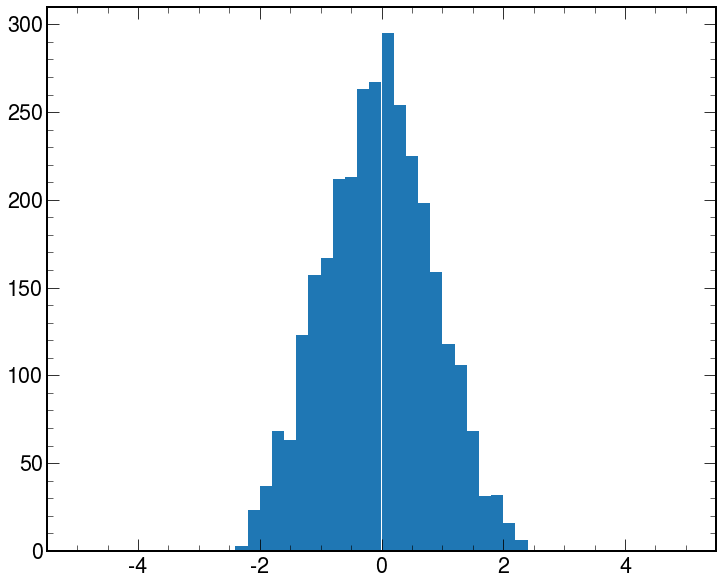

In [10]:
fig = plt.figure( figsize=(12,10) )
plt.hist( df_signals_protons_multiRP_index[ label_ ][ "jet0_eta" ], bins=50, range=(-5.,5.) )

In [ ]:
# df__ = df_signals_protons_multiRP_index[ label_ ]
# df__.loc[ :, 'jet0_pt_unsmeared' ] = np.sqrt(
#     df__.loc[ :, 'jet0_px' ] ** 2 +
#     df__.loc[ :, 'jet0_py' ] ** 2 )
# df__.loc[ :, 'C_JER_ref' ] = ( df__.loc[ :, 'jet0_pt' ] / df__.loc[ :, 'jet0_pt_unsmeared' ] )
# deltaPhi_jet_genjet_ = ( df__.loc[ :, "jet0_phi"] - df__.loc[ :, "gen_jet0_phi"] )
# msk_dphi_ = ( deltaPhi_jet_genjet_ < -np.pi )
# deltaPhi_jet_genjet_.loc[ msk_dphi_ ] = deltaPhi_jet_genjet_.loc[ msk_dphi_ ] + 2*np.pi
# msk_dphi_ = ( deltaPhi_jet_genjet_ >= np.pi )
# deltaPhi_jet_genjet_.loc[ msk_dphi_ ] = deltaPhi_jet_genjet_.loc[ msk_dphi_ ] - 2*np.pi
# deltaEta_jet_genjet_ = ( df__.loc[ :, "jet0_eta"] - df__.loc[ :, "gen_jet0_eta"] )
# deltaR_jet_genjet_ = np.sqrt( ( deltaPhi_jet_genjet_ ) ** 2 + ( deltaEta_jet_genjet_ ) ** 2 )
# df__.loc[ :, 'deltaR_jet_genjet' ] = deltaR_jet_genjet_
# df__.loc[ :, 'deltaPt_jet_genjet' ] = np.abs( df__.loc[ :, 'jet0_pt_unsmeared' ] - df__.loc[ :, 'gen_jet0_pt' ] )
# df__.loc[ :, 'match_jet_genjet' ] = ( ( df__.loc[ :, 'deltaR_jet_genjet' ] < ( 0.8 / 2 ) ) &
#                                       ( df__.loc[ :, 'deltaPt_jet_genjet' ] < ( 3. * df__.loc[ :, 'jet0_jer_res' ] * df__.loc[ :, 'jet0_pt_unsmeared' ] ) ) )  
# print ( np.sum( df__.loc[ :, 'match_jet_genjet' ] ) )
# print ( np.sum( df__.loc[ :, 'match_jet_genjet' ] ) / df__.shape[0] )

# # df__[ [ 'C_JER_ref', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ]
# df__[ [ 'C_JER_ref', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ].loc[ ~df__.loc[ :, 'match_jet_genjet' ] ]

In [ ]:
# df__.loc[ :, 'C_JER' ] = np.nan
# df__.loc[ :, 'JER_rand' ] = np.nan
# df__.loc[ :, 'C_JER_jer_up' ] = np.nan
# df__.loc[ :, 'C_JER_jer_dw' ] = np.nan
# msk_match_ = df__.loc[ :, 'match_jet_genjet' ]

# df__.loc[ :, 'C_JER' ].where( ~msk_match_, ( 1. + ( df__.loc[ :, 'jet0_jer_sf' ] - 1. ) *
#                                            ( ( df__.loc[ :, 'jet0_pt_unsmeared' ] - df__.loc[ :, 'gen_jet0_pt' ] ) / df__.loc[ :, 'jet0_pt_unsmeared' ] ) ),
#                                            inplace=True )
# df__.loc[ :, 'C_JER' ].where( msk_match_, df__.loc[ :, 'C_JER_ref' ], inplace=True )
# df__.loc[ :, 'JER_rand' ].where( msk_match_, ( ( df__.loc[ :, 'C_JER_ref' ] - 1. ) / np.sqrt( np.max( ( ( df__.loc[ :, 'jet0_jer_sf' ] ** 2 ) - 1. ) , 0. ) ) ), inplace=True )
# df__.loc[ :, 'C_JER_jer_up' ].where( ~msk_match_, ( 1. + ( df__.loc[ :, 'jet0_jer_sfup' ] - 1. ) *
#                                                   ( ( df__.loc[ :, 'jet0_pt_unsmeared' ] - df__.loc[ :, 'gen_jet0_pt' ] ) / df__.loc[ :, 'jet0_pt_unsmeared' ] ) ),
#                                                   inplace=True )
# df__.loc[ :, 'C_JER_jer_dw' ].where( ~msk_match_, ( 1. + ( df__.loc[ :, 'jet0_jer_sfdown' ] - 1. ) *
#                                                   ( ( df__.loc[ :, 'jet0_pt_unsmeared' ] - df__.loc[ :, 'gen_jet0_pt' ] ) / df__.loc[ :, 'jet0_pt_unsmeared' ] ) ),
#                                                   inplace=True )
# df__.loc[ :, 'C_JER_jer_up' ].where( msk_match_, ( 1. + df__.loc[ :, 'JER_rand' ] * np.sqrt( np.max( ( ( df__.loc[ :, 'jet0_jer_sfup' ] ** 2 ) - 1. ) , 0. ) ) ), inplace=True )
# df__.loc[ :, 'C_JER_jer_dw' ].where( msk_match_, ( 1. + df__.loc[ :, 'JER_rand' ] * np.sqrt( np.max( ( ( df__.loc[ :, 'jet0_jer_sfdown' ] ** 2 ) - 1. ) , 0. ) ) ), inplace=True )


In [12]:
df__ = df_signals_protons_multiRP_index[ label_ ]

# df__[ [ 'C_JER_ref', 'C_JER', 'JER_rand', 'C_JER_jer_up', 'C_JER_jer_dw', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ]
df__[ [ 'C_JER_ref', 'C_JER', 'JER_rand', 'C_JER_jer_up', 'C_JER_jer_dw', 'jet0_cjer', 'jet0_cjer_up', 'jet0_cjer_down', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ].loc[ df__.loc[ :, 'match_jet_genjet' ] ]
# df__[ [ 'C_JER_ref', 'C_JER', 'JER_rand', 'C_JER_jer_up', 'C_JER_jer_dw', 'jet0_jer_res', 'jet0_jer_sf', 'jet0_jer_sfup', 'jet0_jer_sfdown', 'jet0_pt_unsmeared', 'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_px', 'jet0_py', 'jet0_pt_nom', 'jet0_px_nom', 'jet0_py_nom', 'gen_jet0_pt', 'gen_jet0_eta', 'gen_jet0_phi', 'deltaR_jet_genjet', 'deltaPt_jet_genjet', 'match_jet_genjet' ] ].loc[ ~df__.loc[ :, 'match_jet_genjet' ] ]

C_JER_ref     C_JER  JER_rand  \
run lumiblock event hash_id              slice                                  
1   10        98    11108945275985346800 0       1.005513  1.005513       NaN   
                                         0       1.005513  1.005513       NaN   
    12        111   14940096560224219535 0       0.998575  0.998575       NaN   
    13        124   9769400599093786817  0       1.002270  1.002270       NaN   
    21        203   11873026798130353900 0       1.004972  1.004972       NaN   
...                                                   ...       ...       ...   
    9988      99879 8441746362180913029  0       1.030982  1.030982       NaN   
    9997      99969 7562332171816749490  0       1.003382  1.003382       NaN   
    9999      99982 2401133407686114619  0       0.993630  0.993630       NaN   
                                         0       0.993630  0.993630       NaN   
              99990 10105934940058465847 0       1.006533  1.006533       NaN   

                                                C_JER_jer_up  C_JER_jer_dw  \
run lumiblock event hash_id              slice                               
1   10        98    11108945275985346800 0          1.006756      1.004269   
                                         0          1.006756      1.004269   
    12        111   14940096560224219535 0          0.998471      0.998678   
    13        124   9769400599093786817  0          1.002436      1.002105   
    21        203   11873026798130353900 0          1.006094      1.003850   
...                                                      ...           ...   
    9988      99879 8441746362180913029  0          1.033248      1.028738   
    9997      99969 7562332171816749490  0          1.004211      1.002553   
    9999      99982 2401133407686114619  0          0.992192      0.995067   
                                         0          0.992192      0.995067   
              99990 10105934940058465847 0          1.008134      1.004932   

                                                jet0_cjer  jet0_cjer_up  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0       1.005513      1.006756   
                                         0       1.005513      1.006756   
    12        111   14940096560224219535 0       0.998575      0.998471   
    13        124   9769400599093786817  0       1.002270      1.002436   
    21        203   11873026798130353900 0       1.004972      1.006094   
...                                                   ...           ...   
    9988      99879 8441746362180913029  0       1.030982      1.033248   
    9997      99969 7562332171816749490  0       1.003382      1.004211   
    9999      99982 2401133407686114619  0       0.993630      0.992192   
                                         0       0.993630      0.992192   
              99990 10105934940058465847 0       1.006533      1.008134   

                                                jet0_cjer_down  jet0_jer_res  \
run lumiblock event hash_id              slice                                 
1   10        98    11108945275985346800 0            1.004269      0.078058   
                                         0            1.004269      0.078058   
    12        111   14940096560224219535 0            0.998678      0.052056   
    13        124   9769400599093786817  0            1.002105      0.054179   
    21        203   11873026798130353900 0            1.003850      0.073125   
...                                                        ...           ...   
    9988      99879 8441746362180913029  0            1.028738      0.075987   
    9997      99969 7562332171816749490  0            1.002553      0.057988   
    9999      99982 2401133407686114619  0            0.995067      0.057023   
                                         0            0.995067      0.057023   
              99990 10105934940058465847 0 

In [13]:
msk_match_ = df__.loc[ :, 'match_jet_genjet' ]
print ( np.mean( df__.loc[ msk_match_ ].loc[ :, 'C_JER' ] - df__.loc[ msk_match_ ].loc[ :, 'C_JER_ref' ] ) ) 
print ( np.std( df__.loc[ msk_match_ ].loc[ :, 'C_JER' ] - df__.loc[ msk_match_ ].loc[ :, 'C_JER_ref' ] ) )
print ( np.mean( df__.loc[ ~msk_match_ ].loc[ :, 'JER_rand' ] ) )
print ( np.std( df__.loc[ ~msk_match_ ].loc[ :, 'JER_rand' ] ) )

-2.122107517394117e-05
0.001350294473530928
0.05907952540065543
0.02997938823865651


In [ ]:
fig = plt.figure( figsize=(12,10) )
# plt.hist( df__.loc[ ~msk_match_ ].loc[ :, 'JER_rand' ], bins=50, range=(-0.2, 0.2) )
# plt.hist( ( df__.loc[ msk_match_ ].loc[ :, 'C_JER' ] - df__.loc[ msk_match_ ].loc[ :, 'C_JER_ref' ] ), bins=50, range=(-0.05, 0.05) )
plt.hist( ( df__.loc[ ~msk_match_ ].loc[ :, 'C_JER_ref' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER' )
plt.hist( ( df__.loc[ ~msk_match_ ].loc[ :, 'C_JER_jer_up' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER_jer_up' )
plt.hist( ( df__.loc[ ~msk_match_ ].loc[ :, 'C_JER_jer_dw' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER_jer_dw' )
plt.legend( loc='best', fontsize=16 )
# plt.hist( ( df__.loc[ msk_match_ ].loc[ :, 'C_JER_ref' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER' )
# plt.hist( ( df__.loc[ msk_match_ ].loc[ :, 'C_JER_jer_up' ] / df__.loc[ :, 'C_JER' ] ), bins=50, range=(0.90, 1.10), histtype='step', label='C_JER_jer_up' )
# plt.hist( ( df__.loc[ msk_match_ ].loc[ :, 'C_JER_jer_dw' ] / df__.loc[ :, 'C_JER' ] ), bins=100, range=(0.90, 1.10), histtype='step', label='C_JER_jer_dw' )
# plt.legend( loc='best', fontsize=16 )

In [14]:
msk_columns_jes_ = [ key_.find( 'jes' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_jes_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_jes_ ]
columns_ = [ "period" ]
columns_.extend( columns_jes_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period  jet0_pt_jes_up  \
run lumiblock event hash_id              slice                           
1   10        98    11108945275985346800 0      2018D1      237.961059   
                                         0      2018D1      237.961059   
    12        111   14940096560224219535 0      2018D1      974.677504   
    13        124   9769400599093786817  0       2018A      785.488455   
    21        203   11873026798130353900 0      2018D2      279.709545   
...                                                ...             ...   
    9988      99879 8441746362180913029  0      2018D2      240.312155   
    9997      99969 7562332171816749490  0       2018A      667.732692   
    9999      99982 2401133407686114619  0       2018A      712.586138   
                                         0       2018A      712.586138   
              99990 10105934940058465847 0       2018A      536.161150   

                                                jet0_energy_jes_up  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0              293.315885   
                                         0              293.315885   
    12        111   14940096560224219535 0             1050.238302   
    13        124   9769400599093786817  0              812.975757   
    21        203   11873026798130353900 0              348.830838   
...                                                            ...   
    9988      99879 8441746362180913029  0              257.654328   
    9997      99969 7562332171816749490  0              893.196581   
    9999      99982 2401133407686114619  0              868.871912   
                                         0              868.871912   
              99990 10105934940058465847 0              761.308144   

                                                jet0_mass_jes_up  \
run lumiblock event hash_id              slice                     
1   10        98    11108945275985346800 0             71.530968   
                                         0             71.530968   
    12        111   14940096560224219535 0             73.788513   
    13        124   9769400599093786817  0             42.007103   
    21        203   11873026798130353900 0             70.080826   
...                                                          ...   
    9988      99879 8441746362180913029  0             12.723802   
    9997      99969 7562332171816749490  0             71.729851   
    9999      99982 2401133407686114619  0             56.510349   
                                         0             56.510349   
              99990 10105934940058465847 0             92.846283   

                                                jet0_corrmass_jes_up  \
run lumiblock event hash_id              slice                         
1   10        98    11108945275985346800 0                 77.110274   
                                         0                 77.110274   
    12        111   14940096560224219535 0                 78.787600   
    13        124   9769400599093786817  0                 44.963304   
    21        203   11873026798130353900 0                 75.577843   
...                                                              ...   
    9988      99879 8441746362180913029  0                 13.688791   
    9997      99969 7562332171816749490  0                 77.842819   
    9999      99982 2401133407686114619  0                 60.684725   
                                         0                 60.684725   
              99990 10105934940058465847 0                100.822401   

                                                jet0_px_jes_up  \
run lumiblock event hash_id              slice                   
1   10        98    11108945275985346800 0          170.911979   
                                         0          170.911979   
    12        111   14940096560224219535 0          -27.206491   
    13        124   97

In [15]:
msk_columns_jer_ = [ key_.find( 'jer' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_jer_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_jer_ ]
columns_ = [ "period" ]
columns_.extend( columns_jer_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period  jet0_jer_res  \
run lumiblock event hash_id              slice                         
1   10        98    11108945275985346800 0      2018D1      0.078058   
                                         0      2018D1      0.078058   
    12        111   14940096560224219535 0      2018D1      0.052056   
    13        124   9769400599093786817  0       2018A      0.054179   
    21        203   11873026798130353900 0      2018D2      0.073125   
...                                                ...           ...   
    9988      99879 8441746362180913029  0      2018D2      0.075987   
    9997      99969 7562332171816749490  0       2018A      0.057988   
    9999      99982 2401133407686114619  0       2018A      0.057023   
                                         0       2018A      0.057023   
              99990 10105934940058465847 0       2018A      0.066522   

                                                jet0_jer_sf  jet0_jer_sfup  \
run lumiblock event hash_id              slice                               
1   10        98    11108945275985346800 0           1.1538         1.1885   
                                         0           1.1538         1.1885   
    12        111   14940096560224219535 0           1.1436         1.1541   
    13        124   9769400599093786817  0           1.1436         1.1541   
    21        203   11873026798130353900 0           1.1538         1.1885   
...                                                     ...            ...   
    9988      99879 8441746362180913029  0           1.1436         1.1541   
    9997      99969 7562332171816749490  0           1.1481         1.1844   
    9999      99982 2401133407686114619  0           1.1538         1.1885   
                                         0           1.1538         1.1885   
              99990 10105934940058465847 0           1.1481         1.1844   

                                                jet0_jer_sfdown  jet0_cjer  \
run lumiblock event hash_id              slice                               
1   10        98    11108945275985346800 0               1.1191   1.005513   
                                         0               1.1191   1.005513   
    12        111   14940096560224219535 0               1.1332   0.998575   
    13        124   9769400599093786817  0               1.1332   1.002270   
    21        203   11873026798130353900 0               1.1191   1.004972   
...                                                         ...        ...   
    9988      99879 8441746362180913029  0               1.1332   1.030982   
    9997      99969 7562332171816749490  0               1.1118   1.003382   
    9999      99982 2401133407686114619  0               1.1191   0.993630   
                                         0               1.1191   0.993630   
              99990 10105934940058465847 0               1.1118   1.006533   

                                                jet0_cjer_up  jet0_cjer_down  \
run lumiblock event hash_id              slice                                 
1   10        98    11108945275985346800 0          1.006756        1.004269   
                                         0          1.006756        1.004269   
    12        111   14940096560224219535 0          0.998471        0.998678   
    13        124   9769400599093786817  0          1.002436        1.002105   
    21        203   11873026798130353900 0          1.006094        1.003850   
...                                                      ...             ...   
    9988      99879 8441746362180913029  0          1.033248        1.028738   
    9997      99969 7562332171816749490  0          1.004211        1.002553   
    9999      99982 2401133407686114619  0          0.992192        0.995067   
                                         0          0.992192        0.995067   
              99990 10105934940058465847 0          1.008134        1.004932   

                                        

In [16]:
msk_columns_WLep_ = [ key_.find( 'WLep') >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_WLep_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_WLep_ ]
columns_ = [ "period", "recoMWlep" ]
columns_.extend( columns_WLep_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period  recoMWlep  \
run lumiblock event hash_id              slice                      
1   10        98    11108945275985346800 0      2018D1  80.380074   
                                         0      2018D1  80.380074   
    12        111   14940096560224219535 0      2018D1  80.380417   
    13        124   9769400599093786817  0       2018A  80.380089   
    21        203   11873026798130353900 0      2018D2  80.380051   
...                                                ...        ...   
    9988      99879 8441746362180913029  0      2018D2  80.380333   
    9997      99969 7562332171816749490  0       2018A  80.380089   
    9999      99982 2401133407686114619  0       2018A  80.379990   
                                         0       2018A  80.379990   
              99990 10105934940058465847 0       2018A  80.379997   

                                                WLeptonicPt  WLeptonicEta  \
run lumiblock event hash_id              slice                              
1   10        98    11108945275985346800 0       278.464111      0.018967   
                                         0       278.464111      0.018967   
    12        111   14940096560224219535 0       936.522217      0.061109   
    13        124   9769400599093786817  0       749.250549      0.339703   
    21        203   11873026798130353900 0       282.036896      0.900311   
...                                                     ...           ...   
    9988      99879 8441746362180913029  0       223.110001     -1.978794   
    9997      99969 7562332171816749490  0       671.506165     -0.179620   
    9999      99982 2401133407686114619  0       722.701721     -0.010955   
                                         0       722.701721     -0.010955   
              99990 10105934940058465847 0       492.650360      0.492257   

                                                WLeptonicPhi  WLeptonicPt_nom  \
run lumiblock event hash_id              slice                                  
1   10        98    11108945275985346800 0          2.330840       278.464111   
                                         0          2.330840       278.464111   
    12        111   14940096560224219535 0          1.548330       936.522217   
    13        124   9769400599093786817  0          1.478691       749.250549   
    21        203   11873026798130353900 0         -0.684483       282.036896   
...                                                      ...              ...   
    9988      99879 8441746362180913029  0          0.952612       223.110001   
    9997      99969 7562332171816749490  0         -0.687656       671.506165   
    9999      99982 2401133407686114619  0          0.687202       722.701721   
                                         0          0.687202       722.701721   
              99990 10105934940058465847 0          2.360230       492.650360   

                                                WLeptonicPx_nom  \
run lumiblock event hash_id              slice                    
1   10        98    11108945275985346800 0          -191.848648   
                                         0          -191.848648   
    12        111   14940096560224219535 0            21.038715   
    13        124   9769400599093786817  0            68.912270   
    21        203   11873026798130353900 0           218.507004   
...                                                         ...   
    9988      99879 8441746362180913029  0           129.304871   
    9997      99969 7562332171816749490  0           518.896912   
    9999      99982 2401133407686114619  0           558.665771   
                                         0           558.665771   
              99990 10105934940058465847 0          -349.759277   

                                                WLeptonicPy_nom  \
run lumiblock event hash_id              slice                    
1   10        98    11108945275985346800 0           201.832504   
                     

In [17]:
msk_columns_WW_ = [ key_.find( 'WW') >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_WW_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_WW_ ]
columns_ = [ "period" ]
columns_.extend( columns_WW_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period      recoMWW  \
run lumiblock event hash_id              slice                        
1   10        98    11108945275985346800 0      2018D1   560.863831   
                                         0      2018D1   560.863831   
    12        111   14940096560224219535 0      2018D1  1939.867798   
    13        124   9769400599093786817  0       2018A  1603.792725   
    21        203   11873026798130353900 0      2018D2   758.911987   
...                                                ...          ...   
    9988      99879 8441746362180913029  0      2018D2   823.796021   
    9997      99969 7562332171816749490  0       2018A  1409.773926   
    9999      99982 2401133407686114619  0       2018A  1514.455322   
                                         0       2018A  1514.455322   
              99990 10105934940058465847 0       2018A  1290.180786   

                                                recoRapidityWW    dphiWW  \
run lumiblock event hash_id              slice                             
1   10        98    11108945275985346800 0           -0.257891  3.100374   
                                         0           -0.257891  3.100374   
    12        111   14940096560224219535 0            0.216989 -3.136142   
    13        124   9769400599093786817  0            0.054177  3.131840   
    21        203   11873026798130353900 0            0.146666  3.136013   
...                                                        ...       ...   
    9988      99879 8441746362180913029  0           -0.836767  3.019344   
    9997      99969 7562332171816749490  0           -0.480313 -3.135247   
    9999      99982 2401133407686114619  0           -0.316934  3.139177   
                                         0           -0.316934  3.139177   
              99990 10105934940058465847 0           -0.207567  3.129791   

                                                WW_energy_nom   WW_pz_nom  \
run lumiblock event hash_id              slice                              
1   10        98    11108945275985346800 0         581.340576 -146.901459   
                                         0         581.340576 -146.901459   
    12        111   14940096560224219535 0        1985.990967  424.091919   
    13        124   9769400599093786817  0        1606.006958   85.460464   
    21        203   11873026798130353900 0         758.916992  100.174591   
...                                                       ...         ...   
    9988      99879 8441746362180913029  0        1082.466553 -723.420837   
    9997      99969 7562332171816749490  0        1575.417725 -702.617676   
    9999      99982 2401133407686114619  0        1591.224976 -488.031311   
                                         0        1591.224976 -488.031311   
              99990 10105934940058465847 0        1317.242676 -273.203583   

                                                    MWW_nom   YWW_nom  \
run lumiblock event hash_id              slice                          
1   10        98    11108945275985346800 0       560.803162 -0.258289   
                                         0       560.803162 -0.258289   
    12        111   14940096560224219535 0      1939.900635  0.216879   
    13        124   9769400599093786817  0      1603.385986  0.053263   
    21        203   11873026798130353900 0       752.264221  0.132771   
...                                                     ...       ...   
    9988      99879 8441746362180913029  0       804.581482 -0.807679   
    9997      99969 7562332171816749490  0      1410.034302 -0.479681   
    9999      99982 2401133407686114619  0      1514.470581 -0.316901   
                                         0      1514.470581 -0.316901   
              99990 10105934940058465847 0      1287.929443 -0.210459   

                                                WW_energy_jes_up  \
run lumiblock event hash_id              slice                     
1   10        98    11108945275985346800 0     

In [18]:
msk_columns_xi_ = [ key_.find( 'xi' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_xi_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_xi_ ]
columns_ = [ "period" ]
columns_.extend( columns_xi_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period        xi  \
run lumiblock event hash_id              slice                     
1   10        98    11108945275985346800 0      2018D1  0.041581   
                                         0      2018D1  0.063192   
    12        111   14940096560224219535 0      2018D1  0.135936   
    13        124   9769400599093786817  0       2018A  0.114071   
    21        203   11873026798130353900 0      2018D2  0.060389   
...                                                ...       ...   
    9988      99879 8441746362180913029  0      2018D2  0.144148   
    9997      99969 7562332171816749490  0       2018A  0.074542   
    9999      99982 2401133407686114619  0       2018A  0.128056   
                                         0       2018A  0.143923   
              99990 10105934940058465847 0       2018A  0.122026   

                                                xiCMS_45_nom  xiCMS_56_nom  \
run lumiblock event hash_id              slice                               
1   10        98    11108945275985346800 0          0.031754      0.054355   
                                         0          0.031754      0.054355   
    12        111   14940096560224219535 0          0.184509      0.119264   
    13        124   9769400599093786817  0          0.129168      0.116020   
    21        203   11873026798130353900 0          0.064684      0.049273   
...                                                      ...           ...   
    9988      99879 8441746362180913029  0          0.026724      0.138020   
    9997      99969 7562332171816749490  0          0.066335      0.174430   
    9999      99982 2401133407686114619  0          0.083897      0.158978   
                                         0          0.083897      0.158978   
              99990 10105934940058465847 0          0.079190      0.121221   

                                                xiCMS_45_jes_up  \
run lumiblock event hash_id              slice                    
1   10        98    11108945275985346800 0             0.031818   
                                         0             0.031818   
    12        111   14940096560224219535 0             0.185124   
    13        124   9769400599093786817  0             0.129402   
    21        203   11873026798130353900 0             0.064753   
...                                                         ...   
    9988      99879 8441746362180913029  0             0.026869   
    9997      99969 7562332171816749490  0             0.066462   
    9999      99982 2401133407686114619  0             0.084059   
                                         0             0.084059   
              99990 10105934940058465847 0             0.079267   

                                                xiCMS_56_jes_up  \
run lumiblock event hash_id              slice                    
1   10        98    11108945275985346800 0             0.054567   
                                         0             0.054567   
    12        111   14940096560224219535 0             0.119557   
    13        124   9769400599093786817  0             0.116384   
    21        203   11873026798130353900 0             0.049518   
...                                                         ...   
    9988      99879 8441746362180913029  0             0.138102   
    9997      99969 7562332171816749490  0             0.175047   
    9999      99982 2401133407686114619  0             0.159555   
                                         0             0.159555   
              99990 10105934940058465847 0             0.121664   

                                                xiCMS_45_jes_dw  \
run lumiblock event hash_id              slice                    
1   10        98    11108945275985346800 0             0.031691   
                                         0             0.031691   
    12        111   14940096560224219535 0             0.183893   
    13        124   9769400599093786817  0             0.128933   
  

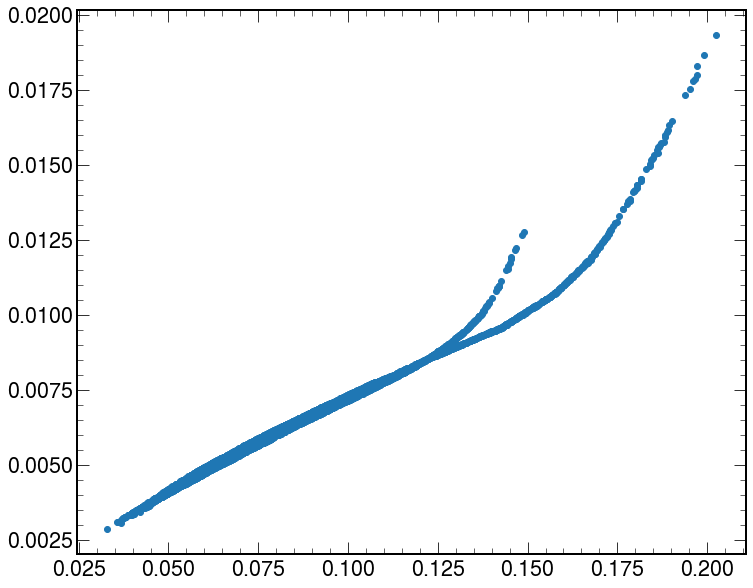

In [19]:
fig = plt.figure( figsize=(12,10) )
plt.plot( df_signals_protons_multiRP_index[ label_ ][ "xi_nom" ], df_signals_protons_multiRP_index[ label_ ][ "sigma_xi" ], 'o' )

In [20]:
msk_columns_eff_ = [ key_.find( 'eff' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_eff_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_eff_ ]
print ( columns_eff_ )
columns_ = [ "period" ]
columns_.extend( columns_eff_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

Index(['eff_proton_all_weighted', 'eff_proton_all_2018A',
       'eff_proton_all_2018B1', 'eff_proton_all_2018B2',
       'eff_proton_all_2018C', 'eff_proton_all_2018D1',
       'eff_proton_all_2018D2', 'eff_proton_all', 'eff_proton_unc'],
      dtype='object')


period  \
run lumiblock event hash_id              slice           
1   10        98    11108945275985346800 0      2018D1   
                                         0      2018D1   
    12        111   14940096560224219535 0      2018D1   
    13        124   9769400599093786817  0       2018A   
    21        203   11873026798130353900 0      2018D2   
...                                                ...   
    9988      99879 8441746362180913029  0      2018D2   
    9997      99969 7562332171816749490  0       2018A   
    9999      99982 2401133407686114619  0       2018A   
                                         0       2018A   
              99990 10105934940058465847 0       2018A   

                                                eff_proton_all_weighted  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0                     0.825299   
                                         0                     0.775468   
    12        111   14940096560224219535 0                     0.834957   
    13        124   9769400599093786817  0                     0.800677   
    21        203   11873026798130353900 0                     0.749124   
...                                                                 ...   
    9988      99879 8441746362180913029  0                     0.803526   
    9997      99969 7562332171816749490  0                     0.847641   
    9999      99982 2401133407686114619  0                     0.859714   
                                         0                     0.360415   
              99990 10105934940058465847 0                     0.841073   

                                                eff_proton_all_2018A  \
run lumiblock event hash_id              slice                         
1   10        98    11108945275985346800 0                  0.795513   
                                         0                  0.758457   
    12        111   14940096560224219535 0                  0.827796   
    13        124   9769400599093786817  0                  0.781314   
    21        203   11873026798130353900 0                  0.721157   
...                                                              ...   
    9988      99879 8441746362180913029  0                  0.792874   
    9997      99969 7562332171816749490  0                  0.821285   
    9999      99982 2401133407686114619  0                  0.845938   
                                         0                  0.546880   
              99990 10105934940058465847 0                  0.825298   

                                                eff_proton_all_2018B1  \
run lumiblock event hash_id              slice                          
1   10        98    11108945275985346800 0                   0.831256   
                                         0                   0.777954   
    12        111   14940096560224219535 0                   0.830634   
    13        124   9769400599093786817  0                   0.805286   
    21        203   11873026798130353900 0                   0.757824   
...                                                               ...   
    9988      99879 8441746362180913029  0                   0.796173   
    9997      99969 7562332171816749490  0                   0.841238   
    9999      99982 2401133407686114619  0                   0.863987   
                                         0                   0.497434   
              99990 10105934940058465847 0                   0.836187   

                                                eff_proton_all_2018B2  \
run lumiblock event hash_id              slice                          
1   10        98    11108945275985346800 0                   0.831263   
                                         0                   0.754507   
    12        111   14940096560224219535 0                   0.790310   
    13        124   9769400599093786817  0                   0.78

In [21]:
msk_columns_sf_ = [ key_.find( 'sf' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_sf_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_sf_ ]
columns_ = [ "period" ]
columns_.extend( columns_sf_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period  jet0_jer_sf  \
run lumiblock event hash_id              slice                        
1   10        98    11108945275985346800 0      2018D1       1.1538   
                                         0      2018D1       1.1538   
    12        111   14940096560224219535 0      2018D1       1.1436   
    13        124   9769400599093786817  0       2018A       1.1436   
    21        203   11873026798130353900 0      2018D2       1.1538   
...                                                ...          ...   
    9988      99879 8441746362180913029  0      2018D2       1.1436   
    9997      99969 7562332171816749490  0       2018A       1.1481   
    9999      99982 2401133407686114619  0       2018A       1.1538   
                                         0       2018A       1.1538   
              99990 10105934940058465847 0       2018A       1.1481   

                                                jet0_jer_sfup  \
run lumiblock event hash_id              slice                  
1   10        98    11108945275985346800 0             1.1885   
                                         0             1.1885   
    12        111   14940096560224219535 0             1.1541   
    13        124   9769400599093786817  0             1.1541   
    21        203   11873026798130353900 0             1.1885   
...                                                       ...   
    9988      99879 8441746362180913029  0             1.1541   
    9997      99969 7562332171816749490  0             1.1844   
    9999      99982 2401133407686114619  0             1.1885   
                                         0             1.1885   
              99990 10105934940058465847 0             1.1844   

                                                jet0_jer_sfdown  sf_muon_id  \
run lumiblock event hash_id              slice                                
1   10        98    11108945275985346800 0               1.1191    0.990580   
                                         0               1.1191    0.990580   
    12        111   14940096560224219535 0               1.1332    0.990580   
    13        124   9769400599093786817  0               1.1332    0.990580   
    21        203   11873026798130353900 0               1.1191    0.981689   
...                                                         ...         ...   
    9988      99879 8441746362180913029  0               1.1332    0.967750   
    9997      99969 7562332171816749490  0               1.1118    0.990580   
    9999      99982 2401133407686114619  0               1.1191    0.990580   
                                         0               1.1191    0.990580   
              99990 10105934940058465847 0               1.1118    0.990580   

                                                sf_muon_id_unc  sf_muon_id_up  \
run lumiblock event hash_id              slice                                  
1   10        98    11108945275985346800 0            0.002602       0.993182   
                                         0            0.002602       0.993182   
    12        111   14940096560224219535 0            0.002602       0.993182   
    13        124   9769400599093786817  0            0.002602       0.993182   
    21        203   11873026798130353900 0            0.002572       0.984261   
...                                                        ...            ...   
    9988      99879 8441746362180913029  0            0.005727       0.973477   
    9997      99969 7562332171816749490  0            0.002602       0.993182   
    9999      99982 2401133407686114619  0            0.002602       0.993182   
                                         0            0.002602       0.993182   
              99990 10105934940058465847 0            0.002602       0.993182   

                                                sf_muon_id_dw  
run lumiblock event hash_id              slice                 
1   10        98    11108945275985346800 0           0.987978  
    

In [24]:
# print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_proton_all_weighted" ] ) )
# print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_multitrack_weighted" ] ) )
# print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_strictzero_weighted" ] ) )
# print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_proton_all" ] ) )
# print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_multitrack" ] ) )
# print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_strictzero" ] ) )

print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_proton_all_weighted" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_proton_all" ] ) )

0.8069732742963631
0.8063247822656677


In [25]:
df_protons_multiRP_groupby = df_signals_protons_multiRP_index[ label_ ][ [ "arm" ] ].groupby( ["run","lumiblock","event","slice"] )
msk_2protons = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) >= 1 ) )
msk_1proton_Arm0 = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) == 0 ) )
msk_1proton_Arm1 = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) == 0 ) & ( np.sum( s_ == 1 ) >= 1 ) )
print ( msk_2protons )
print ( msk_1proton_Arm0 )
print ( msk_1proton_Arm1 )

run  lumiblock  event  hash_id               slice
1    10         98     11108945275985346800  0         True
                                             0         True
     12         111    14940096560224219535  0        False
     13         124    9769400599093786817   0        False
     21         203    11873026798130353900  0        False
                                                      ...  
     9988       99879  8441746362180913029   0        False
     9997       99969  7562332171816749490   0        False
     9999       99982  2401133407686114619   0         True
                                             0         True
                99990  10105934940058465847  0        False
Name: arm, Length: 3104, dtype: bool
run  lumiblock  event  hash_id               slice
1    10         98     11108945275985346800  0        False
                                             0        False
     12         111    14940096560224219535  0        False
     13         124  

In [26]:
df_signals_protons_multiRP_index[ label_ ][ msk_2protons ]
# df_signals_protons_multiRP_index[ label_ ][ msk_1proton_Arm0 ]
# df_signals_protons_multiRP_index[ label_ ][ msk_1proton_Arm1 ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0              130.0       0.4   
                                         0              130.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
                                         0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
...                                                       ...       ...   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
                                         0              155.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   
                                         0              146.0       0.4   

                                                instLumi        xi       thx  \
run lumiblock event hash_id              slice                                 
1   10        98    11108945275985346800 0           0.0  0.041581 -0.000002   
                                         0           0.0  0.063192  0.000037   
    25        246   6732049695921593490  0           0.0  0.112900 -0.000057   
                                         0           0.0  0.147812 -0.000094   
    48        473   8749266920161569861  0           0.0  0.064298  0.000081   
...                                                  ...       ...       ...   
    9958      99577 8240557362429832909  0           0.0  0.082957 -0.000047   
    9967      99661 9457232060636232257  0           0.0  0.074232  0.000165   
                                         0           0.0  0.119332  0.000070   
    9999      99982 2401133407686114619  0           0.0  0.128056 -0.000069   
                                         0           0.0  0.143923  0.000127   

                                                     thy         t  ismultirp  \
run lumiblock event hash_id              slice                                  
1   10        98    11108945275985346800 0     -0.000009 -0.004968          1   
                                         0      0.000077 -0.288985          1   
    25        246   6732049695921593490  0      0.000090 -0.441904          1   
                                         0      0.000046 -0.418100          1   
    48        473   8749266920161569861  0     -0.000021 -0.283481          1   
...                                                  ...       ...        ...   
    9958      99577 8240557362429832909  0      0.000034 -0.137231          1   
    9967      99661 9457232060636232257  0      0.000021 -1.087193          1   
                                         0      0.000025 -0.217387          1   
    9999      99982 2401133407686114619  0      0.000102 -0.575225          1   
                                         0      0.000046 -0.679271          1   

                                                rpid  arm  ...  yhigh  \
run lumiblock event hash_id              slice             ...          
1   10        98    11108945275985346800 0       123    0  ...  3.298   
                                         0       123    1  ...  3.898   
    25        246   6732049695921593490  0       123    0  ...  3.298   
                                         0       123    1  ...  3.898   
    48        473   8749266920161569861  0       123    0  ...  3.298   
...                                              ...  ...  ...    ...   
    9958      99577 8240557362429832909  0       123    1  ...  3.898   
    9967      99661 9457232060636232257  0       123    0  ...  3.298   
                                         0       123    1  ...  3.898   
    9999      99982 2401133407686114619  0       123    0  ...  3.298   
                                         0       123    1  ...  3.898   

                           

In [27]:
df_signals_protons_multiRP_events[ label_ ].columns

Index(['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1',
       ...
       'Diff_YWW_YX_m100_p100', 'MX_m100_m100', 'YX_m100_m100',
       'R_MWW_MX_m100_m100', 'Diff_YWW_YX_m100_m100',
       'eff_proton_all_weighted', 'eff_proton_all', 'eff_proton_unc',
       'eff_proton_var_up', 'eff_proton_var_dw'],
      dtype='object', length=228)

In [28]:
df_signals_protons_multiRP_events[ label_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0              130.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
    55        548   10111487040465804063 0              147.0       0.4   
    60        593   11479252221660711580 0              144.0       0.4   
...                                                       ...       ...   
    9921      99203 4631958745543777280  0              154.0       0.4   
    9932      99320 8072610517918790459  0              130.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   10        98    11108945275985346800 0           0.0  236.454941   
    25        246   6732049695921593490  0           0.0  569.114075   
    48        473   8749266920161569861  0           0.0  376.204132   
    55        548   10111487040465804063 0           0.0  211.374191   
    60        593   11479252221660711580 0           0.0  225.833420   
...                                                  ...         ...   
    9921      99203 4631958745543777280  0           0.0  884.458496   
    9932      99320 8072610517918790459  0           0.0  396.427917   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0     -0.605854 -0.769534   
    25        246   6732049695921593490  0      1.052705  2.353809   
    48        473   8749266920161569861  0      0.305124  3.095006   
    55        548   10111487040465804063 0     -1.255503 -2.017078   
    60        593   11479252221660711580 0      1.460313  1.167191   
...                                                  ...       ...   
    9921      99203 4631958745543777280  0      0.401107  1.897298   
    9932      99320 8072610517918790459  0      0.270221  1.273853   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0       291.459412   71.138802   
    25        246   6732049695921593490  0       927.567322  103.537247   
    48        473   8749266920161569861  0       396.210815    8.142470   
    55        548   10111487040465804063 0       404.987579   10.673149   
    60        593   11479252221660711580 0       520.812378   82.395920   
...                                                     ...         ...   
    9921      99203 4631958745543777280  0       965.082642   77.655876   
    9932      99320 8072610517918790459  0       425.057953   76.337906   
    9958      99577 8240557362429832909  0       574.826660   68.721405   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
    9999      99982 2401133407686114619  0       864.023926   56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   10        98    11108945275985346800 0          76.202141   0.250948  ...   
    2

In [29]:
msk_columns_MX_ = [ key_.find( 'MX' ) >= 0 for key_ in df_signals_protons_multiRP_events[ label_ ].columns ]
columns_MX_ = df_signals_protons_multiRP_events[ label_ ].columns[ msk_columns_MX_ ]
columns_ = [ "period" ]
columns_.extend( columns_MX_ )
df_signals_protons_multiRP_events[ label_ ][ columns_ ]

period           MX  \
run lumiblock event hash_id              slice                        
1   10        98    11108945275985346800 0      2018D1   666.376770   
    25        246   6732049695921593490  0      2018D2  1679.362671   
    48        473   8749266920161569861  0      2018D1  1038.845215   
    55        548   10111487040465804063 0       2018C  1005.320740   
    60        593   11479252221660711580 0       2018A  1504.115356   
...                                                ...          ...   
    9921      99203 4631958745543777280  0       2018A  2111.751709   
    9932      99320 8072610517918790459  0       2018A   905.621582   
    9958      99577 8240557362429832909  0      2018D1  1371.073364   
    9967      99661 9457232060636232257  0       2018A  1223.536499   
    9999      99982 2401133407686114619  0       2018A  1764.854004   

                                                diffMWW_MX  ratioMWW_MX  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0     -105.512939     0.841662   
    25        246   6732049695921593490  0      233.231812     1.138881   
    48        473   8749266920161569861  0      -72.199585     0.930500   
    55        548   10111487040465804063 0     -330.321960     0.671426   
    60        593   11479252221660711580 0      -84.421143     0.943873   
...                                                    ...          ...   
    9921      99203 4631958745543777280  0     -166.161377     0.921316   
    9932      99320 8072610517918790459  0      -84.305359     0.906909   
    9958      99577 8240557362429832909  0     -256.080688     0.813226   
    9967      99661 9457232060636232257  0     -438.020996     0.642004   
    9999      99982 2401133407686114619  0     -250.398682     0.858119   

                                                shiftedRatioMWW_MX  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0               -0.158338   
    25        246   6732049695921593490  0                0.138881   
    48        473   8749266920161569861  0               -0.069500   
    55        548   10111487040465804063 0               -0.328574   
    60        593   11479252221660711580 0               -0.056127   
...                                                            ...   
    9921      99203 4631958745543777280  0               -0.078684   
    9932      99320 8072610517918790459  0               -0.093091   
    9958      99577 8240557362429832909  0               -0.186774   
    9967      99661 9457232060636232257  0               -0.357996   
    9999      99982 2401133407686114619  0               -0.141881   

                                                     MX_nom  R_MWW_MX_nom  \
run lumiblock event hash_id              slice                              
1   10        98    11108945275985346800 0       666.376770      0.841571   
    25        246   6732049695921593490  0      1679.362671      1.133615   
    48        473   8749266920161569861  0      1038.845215      0.926530   
    55        548   10111487040465804063 0      1005.320740      0.664205   
    60        593   11479252221660711580 0      1504.115356      0.898820   
...                                                     ...           ...   
    9921      99203 4631958745543777280  0      2111.751709      0.921041   
    9932      99320 8072610517918790459  0       905.621582      0.906727   
    9958      99577 8240557362429832909  0      1371.073364      0.813188   
    9967      99661 9457232060636232257  0      1223.536499      0.638625   
    9999      99982 2401133407686114619  0      1764.854004      0.858128   

                                                R_MWW_MX_jes_up  \
run lumiblock event hash_id              slice                    
1   10        98    11108945275985346800 0             0.841736   
    25        246   67320496959215

In [30]:
msk_columns_YX_ = [ key_.find( 'YX' ) >= 0 for key_ in df_signals_protons_multiRP_events[ label_ ].columns ]
columns_YX_ = df_signals_protons_multiRP_events[ label_ ].columns[ msk_columns_YX_ ]
columns_ = [ "period" ]
columns_.extend( columns_YX_ )
df_signals_protons_multiRP_events[ label_ ][ columns_ ]

period        YX  diffYWW_YX  \
run lumiblock event hash_id              slice                                 
1   10        98    11108945275985346800 0      2018D1 -0.209270   -0.048621   
    25        246   6732049695921593490  0      2018D2 -0.134719    0.061457   
    48        473   8749266920161569861  0      2018D1 -0.217381   -0.161546   
    55        548   10111487040465804063 0       2018C -0.194165   -0.069999   
    60        593   11479252221660711580 0       2018A -0.340424    0.002355   
...                                                ...       ...         ...   
    9921      99203 4631958745543777280  0       2018A -0.136675    0.126830   
    9932      99320 8072610517918790459  0       2018A  0.025744    0.054343   
    9958      99577 8240557362429832909  0      2018D1  0.240074   -0.027299   
    9967      99661 9457232060636232257  0       2018A -0.237360   -0.213394   
    9999      99982 2401133407686114619  0       2018A -0.058405   -0.258529   

                                                  YX_nom  Diff_YWW_YX_nom  \
run lumiblock event hash_id              slice                              
1   10        98    11108945275985346800 0     -0.209270        -0.049019   
    25        246   6732049695921593490  0     -0.134719         0.066947   
    48        473   8749266920161569861  0     -0.217381        -0.153899   
    55        548   10111487040465804063 0     -0.194165        -0.085419   
    60        593   11479252221660711580 0     -0.340424         0.054687   
...                                                  ...              ...   
    9921      99203 4631958745543777280  0     -0.136675         0.127611   
    9932      99320 8072610517918790459  0      0.025744         0.055431   
    9958      99577 8240557362429832909  0      0.240074        -0.027107   
    9967      99661 9457232060636232257  0     -0.237360        -0.221102   
    9999      99982 2401133407686114619  0     -0.058405        -0.258495   

                                                Diff_YWW_YX_jes_up  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0               -0.049935   
    25        246   6732049695921593490  0                0.068949   
    48        473   8749266920161569861  0               -0.152533   
    55        548   10111487040465804063 0               -0.087945   
    60        593   11479252221660711580 0                0.058782   
...                                                            ...   
    9921      99203 4631958745543777280  0                0.128621   
    9932      99320 8072610517918790459  0                0.055855   
    9958      99577 8240557362429832909  0               -0.026552   
    9967      99661 9457232060636232257  0               -0.223270   
    9999      99982 2401133407686114619  0               -0.259330   

                                                Diff_YWW_YX_jes_dw  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0               -0.048097   
    25        246   6732049695921593490  0                0.064934   
    48        473   8749266920161569861  0               -0.155272   
    55        548   10111487040465804063 0               -0.082875   
    60        593   11479252221660711580 0                0.050556   
...                                                            ...   
    9921      99203 4631958745543777280  0                0.126595   
    9932      99320 8072610517918790459  0                0.055005   
    9958      99577 8240557362429832909  0               -0.027664   
    9967      99661 9457232060636232257  0               -0.218919   
    9999      99982 2401133407686114619  0               -0.257656   

                                                Diff_YWW_YX_jer_up  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0 

In [31]:
msk_columns_eff_ = [ key_.find( 'eff' ) >= 0 for key_ in df_signals_protons_multiRP_events[ label_ ].columns ]
columns_eff_ = df_signals_protons_multiRP_events[ label_ ].columns[ msk_columns_eff_ ]
print ( columns_eff_ )
columns_ = [ "period" ]
columns_.extend( columns_eff_ )
df_signals_protons_multiRP_events[ label_ ][ columns_ ]

Index(['eff_proton_all_weighted', 'eff_proton_all', 'eff_proton_unc',
       'eff_proton_var_up', 'eff_proton_var_dw'],
      dtype='object')


period  \
run lumiblock event hash_id              slice           
1   10        98    11108945275985346800 0      2018D1   
    25        246   6732049695921593490  0      2018D2   
    48        473   8749266920161569861  0      2018D1   
    55        548   10111487040465804063 0       2018C   
    60        593   11479252221660711580 0       2018A   
...                                                ...   
    9921      99203 4631958745543777280  0       2018A   
    9932      99320 8072610517918790459  0       2018A   
    9958      99577 8240557362429832909  0      2018D1   
    9967      99661 9457232060636232257  0       2018A   
    9999      99982 2401133407686114619  0       2018A   

                                                eff_proton_all_weighted  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0                     0.639993   
    25        246   6732049695921593490  0                     0.687556   
    48        473   8749266920161569861  0                     0.686911   
    55        548   10111487040465804063 0                     0.657653   
    60        593   11479252221660711580 0                     0.700342   
...                                                                 ...   
    9921      99203 4631958745543777280  0                     0.647173   
    9932      99320 8072610517918790459  0                     0.674438   
    9958      99577 8240557362429832909  0                     0.667049   
    9967      99661 9457232060636232257  0                     0.714672   
    9999      99982 2401133407686114619  0                     0.309854   

                                                eff_proton_all  \
run lumiblock event hash_id              slice                   
1   10        98    11108945275985346800 0            0.658204   
    25        246   6732049695921593490  0            0.688061   
    48        473   8749266920161569861  0            0.697410   
    55        548   10111487040465804063 0            0.655881   
    60        593   11479252221660711580 0            0.673500   
...                                                        ...   
    9921      99203 4631958745543777280  0            0.630362   
    9932      99320 8072610517918790459  0            0.637027   
    9958      99577 8240557362429832909  0            0.680832   
    9967      99661 9457232060636232257  0            0.692135   
    9999      99982 2401133407686114619  0            0.462627   

                                                eff_proton_unc  \
run lumiblock event hash_id              slice                   
1   10        98    11108945275985346800 0            0.030212   
    25        246   6732049695921593490  0            0.030212   
    48        473   8749266920161569861  0            0.030212   
    55        548   10111487040465804063 0            0.030212   
    60        593   11479252221660711580 0            0.030212   
...                                                        ...   
    9921      99203 4631958745543777280  0            0.030212   
    9932      99320 8072610517918790459  0            0.030212   
    9958      99577 8240557362429832909  0            0.030212   
    9967      99661 9457232060636232257  0            0.030212   
    9999      99982 2401133407686114619  0            0.030212   

                                                eff_proton_var_up  \
run lumiblock event hash_id              slice                      
1   10        98    11108945275985346800 0               1.030212   
    25        246   6732049695921593490  0               1.030212   
    48        473   8749266920161569861  0               1.030212   
    55        548   10111487040465804063 0               1.030212   
    60        593   11479252221660711580 0               1.030212   
...                                                           ...   
    9921      99203 4631958745543777280  0     

run  lumiblock  event  hash_id               slice
1    10         98     11108945275985346800  0        True
     25         246    6732049695921593490   0        True
     48         473    8749266920161569861   0        True
     55         548    10111487040465804063  0        True
     60         593    11479252221660711580  0        True
                                                      ... 
     9921       99203  4631958745543777280   0        True
     9932       99320  8072610517918790459   0        True
     9958       99577  8240557362429832909   0        True
     9967       99661  9457232060636232257   0        True
     9999       99982  2401133407686114619   0        True
Name: MWW_nom, Length: 656, dtype: bool


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 27., 27., 25., 27., 24., 31.,
        22., 31., 30., 30., 29., 16., 12., 12., 12., 12., 11., 12., 10.,
        13., 10.,  9.,  8.,  8.,  7.,  5.,  5.,  4., 10.,  6.,  5.,  8.,
         7.,  9.,  6.,  4.,  3.,  2.,  4.,  5.,  7.,  3.,  6.,  1.,  5.,
         4.,  2.,  4.,  5.,  3.,  5.,  2.,  2.,  4.,  0.,  1.,  4.,  3.,
         2.,  1.,  3.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        

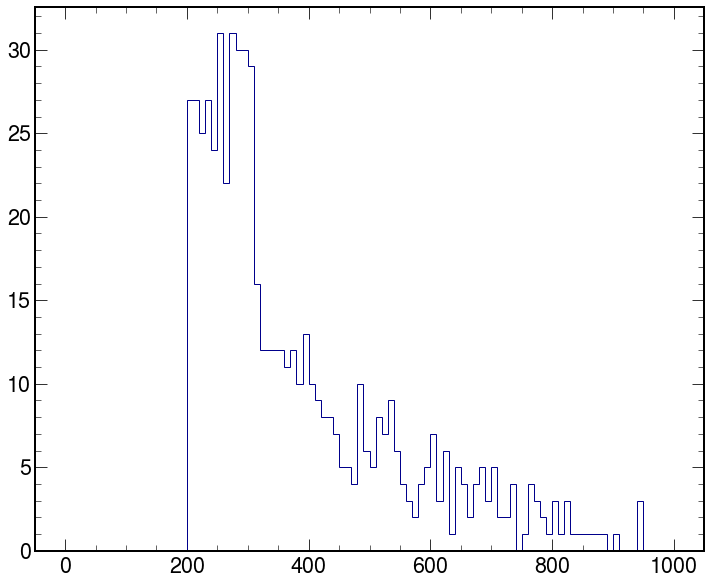

In [35]:
# label_ = "GGToWW-AQGC-A0W1e-6"

msk_MWW = ( df_signals_protons_multiRP_events[ label_ ][ "MWW_nom" ] >= 500. )
print ( msk_MWW )

fig = plt.figure( figsize=(12,10) )

plt.hist( df_signals_protons_multiRP_events[ label_ ][ "jet0_pt" ][ msk_MWW ], histtype='step', color="darkblue", linestyle="-", bins=100, range=( 0., 1000. ) )

1356 1748


Text(0, 1, 'Y (mm)')

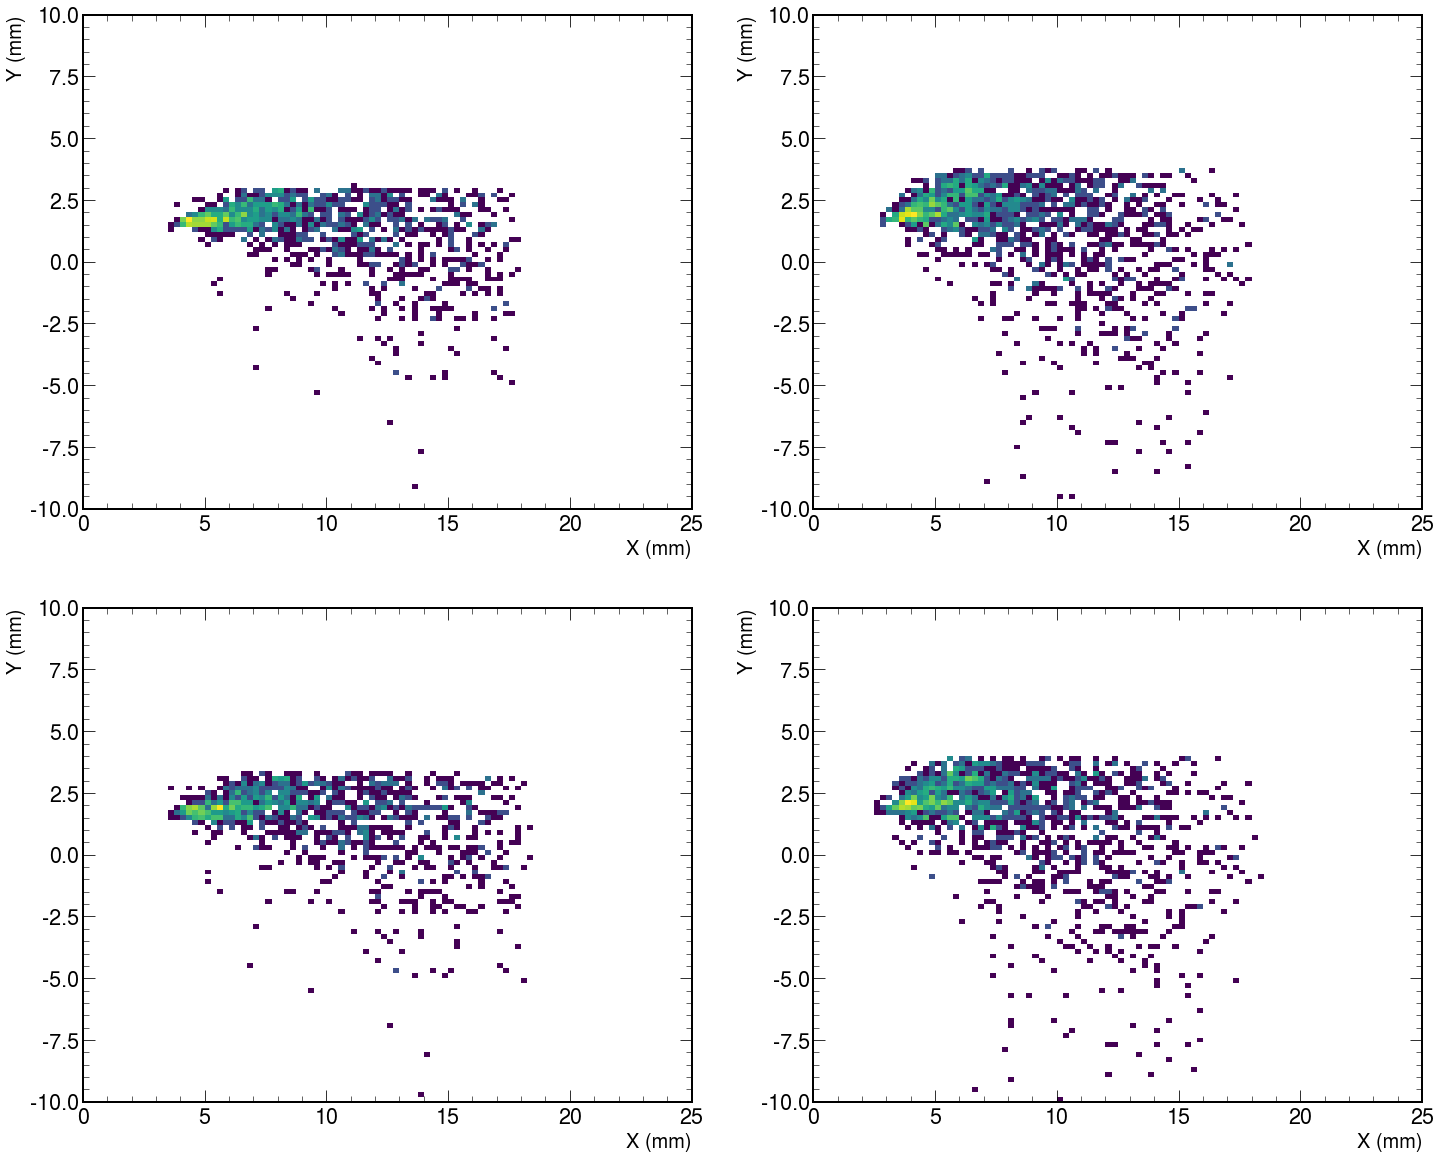

In [36]:
# label_ = "GGToWW-AQGC-A0W5e-6"
df_protons_multiRP_signal_index_ = df_signals_protons_multiRP_index[ label_ ]

msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index_[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index_[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index_[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index_[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_signal_index_[ "trackx1" ][ msk1 ], df_protons_multiRP_signal_index_[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_signal_index_[ "trackx1" ][ msk2 ], df_protons_multiRP_signal_index_[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_signal_index_[ "trackx2" ][ msk1 ], df_protons_multiRP_signal_index_[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_signal_index_[ "trackx2" ][ msk2 ], df_protons_multiRP_signal_index_[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

1356 1748


/tmp/ipykernel_533/4279951091.py:12: RuntimeWarning: invalid value encountered in true_divide
  axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
/tmp/ipykernel_533/4279951091.py:18: RuntimeWarning: invalid value encountered in true_divide
  axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )


Text(0, 1, '$\\theta_x^{\\ast}$')

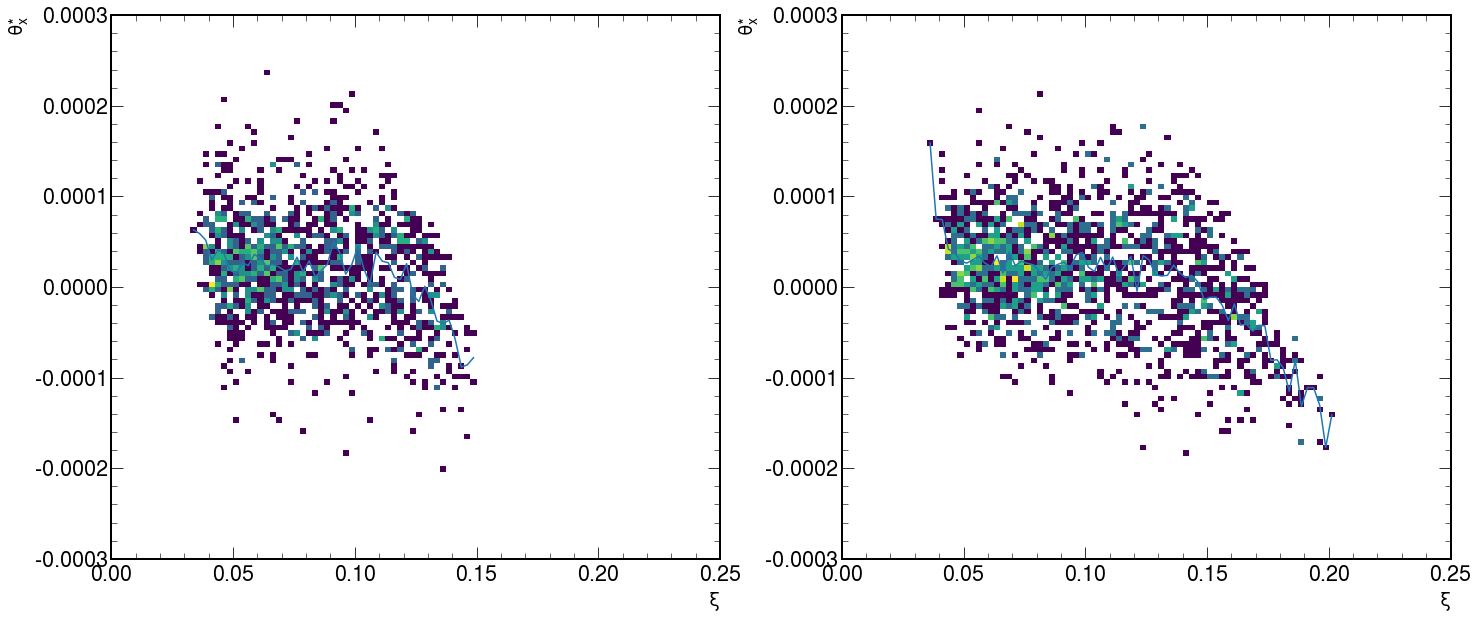

In [37]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index_[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index_[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index_[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index_[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_signal_index_[ "xi" ][ msk1 ], df_protons_multiRP_signal_index_[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_signal_index_[ "xi" ][ msk2 ], df_protons_multiRP_signal_index_[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

### Background

In [ ]:
run_tables = False

resample_factor = 20
label = "data-random-resample_20"

fileNames_bkg = [
    "output-data-random-resample_20-2017B.h5",
    "output-data-random-resample_20-2017C.h5",
    "output-data-random-resample_20-2017D.h5",
    "output-data-random-resample_20-2017E.h5",
    "output-data-random-resample_20-2017F.h5"
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg, df_ppstracks_bkg = 4 * [None]
df_protons_multiRP_bkg_index, df_protons_multiRP_bkg_events, df_ppstracks_bkg_index = 3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:
        df_counts_bkg_list_ = []
        df_protons_multiRP_bkg_index_list_ = []
        df_protons_multiRP_bkg_events_list_ = []
        df_ppstracks_bkg_index_list_ = []
        for file_ in fileNames_bkg:
            df_counts_bkg_, df_protons_multiRP_bkg_, df_protons_singleRP_bkg_, df_ppstracks_bkg_ = get_data( [ file_ ] )
            df_protons_multiRP_bkg_index_, df_protons_multiRP_bkg_events_, df_ppstracks_bkg_index_ = process_data_protons_multiRP( df_protons_multiRP_bkg_, df_ppstracks_bkg_, apply_fiducial=True, within_aperture=True, random_protons=True, runOnMC=False )
            df_counts_bkg_list_.append( df_counts_bkg_ )
            df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index_ )
            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_ )
            df_ppstracks_bkg_index_list_.append( df_ppstracks_bkg_index_ )
            
        df_counts_bkg_ = df_counts_bkg_list_[0]
        for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
            df_counts_bkg_ = df_counts_bkg_.add( df_counts_bkg_list_[ idx_ ] )

        df_protons_multiRP_bkg_index_ = pd.concat( df_protons_multiRP_bkg_index_list_ )
        df_protons_multiRP_bkg_events_ = pd.concat( df_protons_multiRP_bkg_events_list_ )
        df_ppstracks_bkg_index_ = pd.concat( df_ppstracks_bkg_index_list_ )
        
        store_[ "counts" ] = df_counts_bkg_
        store_[ "protons_multiRP"] = df_protons_multiRP_bkg_index_
        store_[ "events_multiRP" ] = df_protons_multiRP_bkg_events_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_bkg = store_[ "counts" ]
    df_protons_multiRP_bkg_index = store_[ "protons_multiRP" ]
    df_protons_multiRP_bkg_events = store_[ "events_multiRP" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [ ]:
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )

In [ ]:
df_counts_bkg

In [ ]:
df_protons_multiRP_bkg_index

In [ ]:
df_protons_multiRP_bkg_events

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk1 ], df_protons_multiRP_bkg_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk2 ], df_protons_multiRP_bkg_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

In [ ]:
labels_samples = {
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W=1e^{-6}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W=2e^{-6}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W=5e^{-6}$"
}

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 1 ] )
df_protons_multiRP_signal_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1

df_protons_multiRP_bkg_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_,  1 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1


In [ ]:
msk_bkg = ( ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
            ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] <= 110.0 ) & 
            ( df_protons_multiRP_bkg_events.loc[ :, "num_bjets_ak4"] == 0 ) )
msk_signal = ( ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] <= 110.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "num_bjets_ak4"] == 0 ) )
df_protons_multiRP_bkg_events = df_protons_multiRP_bkg_events.loc[ msk_bkg ]
df_protons_multiRP_signal_events = df_protons_multiRP_signal_events.loc[ msk_signal ]

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\rm{jet}) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$\tau_1 (\rm{jet})$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\tau_2 (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Jet.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Jet.png", bbox_inches='tight' )

#  'run', 'lumiblock', 'event', 'slice', 'xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 
#  'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 
#  'muon0_pt', 'muon0_eta', 'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso', 'muon0_dxy', 'muon0_dz', 
#  'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 
#  'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi'

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\mu) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\mu)$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$Isolation (\mu)$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$d_z (\mu) \,\rm{(cm)}$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Muon.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Muon.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}}^{\rm{miss}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi({\vec p}_{\rm{T}}^{\rm{miss}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_MET.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_MET.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( "Number of vertices", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( "Number of extra tracks", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}} (W^{\rm{lep}}) \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi (W^{\rm{lep}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_WLeptonic.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_WLeptonic.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{\rm{pp}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.png", bbox_inches='tight' )

In [ ]:
fig = plt.figure( figsize=(12,10) )

plt.hist( ( df_protons_multiRP_bkg_events[ "jet0_tau2" ] / df_protons_multiRP_bkg_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral" )
plt.hist( ( df_protons_multiRP_signal_events[ "jet0_tau2" ] / df_protons_multiRP_signal_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue" )
plt.xlabel( r"$\tau_{21}$", fontsize=20 )
plt.ylabel( "Density", fontsize=20 )
plt.title( "" )

if save_figures:
    plt.savefig( "plots/Variables_tau21.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_tau21.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )

df_protons_multiRP_bkg_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} / M_{\rm{pp}} - 1$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW} - Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.png", bbox_inches='tight' )

In [ ]:
msk_bkg_cut1 = ( np.abs( df_protons_multiRP_bkg_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_bkg_cut2 = ( np.abs( df_protons_multiRP_bkg_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

In [ ]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_bkg_events[ msk_bkg_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightblue' )
df_protons_multiRP_bkg_events[ msk_bkg_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_bkg   = df_protons_multiRP_bkg_events.shape[0]
n_events_bkg_A = df_protons_multiRP_bkg_events[ msk_bkg_A ].shape[0]
n_events_bkg_B = df_protons_multiRP_bkg_events[ msk_bkg_B ].shape[0]
n_events_bkg_C = df_protons_multiRP_bkg_events[ msk_bkg_C ].shape[0]
n_events_bkg_D = df_protons_multiRP_bkg_events[ msk_bkg_D ].shape[0]
resample_factor = 20
print ( "Number of events: {}".format( n_events_bkg / resample_factor ) )
print ( "Number of events (A): {}".format( n_events_bkg_A / resample_factor ) )
print ( "Number of events (B): {}".format( n_events_bkg_B / resample_factor ) )
print ( "Number of events (C): {}".format( n_events_bkg_C / resample_factor ) )
print ( "Number of events (D): {}".format( n_events_bkg_D / resample_factor ) )

### Data

In [ ]:
# run_tables = True

# label = "data"

# fileNames_data = [
#     'output-data-2017B.h5',
#     'output-data-2017C.h5',
#     'output-data-2017D.h5',
#     'output-data-2017E.h5',
#     'output-data-2017F.h5'
# ]

# import time
# print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
# time_s_ = time.time()

# df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = 4 * [None]
# df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index =  3 * [None]

# if run_tables:
#     with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

#         df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = get_data( fileNames_data )
#         df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index = process_data_protons_multiRP( df_protons_multiRP_data, df_ppstracks_data, apply_fiducial=True, within_aperture=True, runOnMC=False )

#         store_[ "counts" ] = df_counts_data
#         store_[ "protons_multiRP"] = df_protons_multiRP_data_index
#         store_[ "events_multiRP" ] = df_protons_multiRP_data_events

# with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
#     df_counts_data = store_[ "counts" ]
#     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]
        
# time_e_ = time.time()
# print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [ ]:
# with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
#     print ( list( store_ ) )

In [38]:
# label = "data"
# label = "data-single-arm"
label_ = "data-2018-muon-2018A"
base_path_ = 'output'
file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
df_counts_data = None
df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None
with pd.HDFStore( file_path_, 'r' ) as store_:
    print ( list( store_ ) )
    df_counts_data = store_[ "counts" ]
    df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
    df_protons_multiRP_data_events = store_[ "events_multiRP" ]

['/counts', '/events_multiRP', '/protons_multiRP']


In [39]:
df_counts_data

All                  512078
Jet                  512078
Muon                 498070
Proton_check_none    498070
Proton               314293
dtype: int64

In [40]:
df_protons_multiRP_data_index

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
316199 738       995631040  0              143.0       0.3  13.800958   
                            0              143.0       0.3  13.800958   
                 995580288  0              143.0       0.3  13.800958   
                            0              143.0       0.3  13.800958   
                 995377984  0              143.0       0.3  13.800958   
...                                          ...       ...        ...   
316153 738       1001627392 0              136.0       0.3  11.209717   
       740       1004659968 0              136.0       0.3  11.193465   
                            0              136.0       0.3  11.193465   
                 1004572224 0              136.0       0.3  11.193465   
                            0              136.0       0.3  11.193465   

                                         xi       thx       thy         t  \
run    lumiblock event      slice                                           
316199 738       995631040  0      0.042746  0.000013  0.000055 -0.132241   
                            0      0.162051  0.000016 -0.000012 -0.042354   
                 995580288  0      0.081579 -0.000035  0.000057 -0.180509   
                            0      0.179899 -0.000055  0.000081 -0.366365   
                 995377984  0      0.044054  0.000086 -0.000031 -0.334824   
...                                     ...       ...       ...       ...   
316153 738       1001627392 0      0.029946  0.000118  0.000028 -0.604297   
       740       1004659968 0      0.053305  0.000074  0.000175 -1.445606   
                            0      0.086595  0.000031  0.000022 -0.063165   
                 1004572224 0      0.029624 -0.000041 -0.000005 -0.070469   
                            0      0.067316 -0.000037  0.000028 -0.091286   

                                   ismultirp  rpid  arm  ...     MWW_nom  \
run    lumiblock event      slice                        ...               
316199 738       995631040  0              1   123    0  ...  440.302521   
                            0              1   123    1  ...  440.302521   
                 995580288  0              1   123    0  ...  949.150696   
                            0              1   123    1  ...  949.150696   
                 995377984  0              1   123    0  ...  583.003113   
...                                      ...   ...  ...  ...         ...   
316153 738       1001627392 0              1   123    1  ...  442.054932   
       740       1004659968 0              1   123    0  ...  417.975616   
                            0              1   123    1  ...  417.975616   
                 1004572224 0              1   123    0  ...  733.849182   
                            0              1   123    1  ...  733.849182   

                                    YWW_nom  xiCMS_45_nom  xiCMS_56_nom  \
run    lumiblock event      slice                                         
316199 738       995631040  0     -0.019539      0.033929      0.035300   
                            0     -0.019539      0.033929      0.035300   
                 995580288  0      0.074358      0.078178      0.067085   
                            0      0.074358      0.078178      0.067085   
                 995377984  0     -0.045281      0.042188      0.046315   
...                                     ...           ...           ...   
316153 738       1001627392 0     -0.236861      0.024876      0.041204   
       740       1004659968 0     -1.731891      0.004820      0.182015   
                            0     -1.731891      0.004820      0.182015   
                 1004572224 0      0.538793      0.095262      0.031438   
                            0      0.538793      0.095262      0.031438   

                                     xi_nom  within_aperture   xlow   xhigh  \
run    lumiblock event      slice      

In [41]:
vars_ = [ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "random", "trackpixshift1", "rpid1", "trackpixshift2", "rpid2", "trackx1", "trackx2", "tracky1", "tracky2" ]
df_protons_multiRP_data_index[ vars_ ]

xi       thx       thy         t  \
run    lumiblock event      slice                                           
316199 738       995631040  0      0.042746  0.000013  0.000055 -0.132241   
                            0      0.162051  0.000016 -0.000012 -0.042354   
                 995580288  0      0.081579 -0.000035  0.000057 -0.180509   
                            0      0.179899 -0.000055  0.000081 -0.366365   
                 995377984  0      0.044054  0.000086 -0.000031 -0.334824   
...                                     ...       ...       ...       ...   
316153 738       1001627392 0      0.029946  0.000118  0.000028 -0.604297   
       740       1004659968 0      0.053305  0.000074  0.000175 -1.445606   
                            0      0.086595  0.000031  0.000022 -0.063165   
                 1004572224 0      0.029624 -0.000041 -0.000005 -0.070469   
                            0      0.067316 -0.000037  0.000028 -0.091286   

                                   ismultirp  rpid  arm  random  \
run    lumiblock event      slice                                 
316199 738       995631040  0              1   123    0       0   
                            0              1   123    1       0   
                 995580288  0              1   123    0       0   
                            0              1   123    1       0   
                 995377984  0              1   123    0       0   
...                                      ...   ...  ...     ...   
316153 738       1001627392 0              1   123    1       0   
       740       1004659968 0              1   123    0       0   
                            0              1   123    1       0   
                 1004572224 0              1   123    0       0   
                            0              1   123    1       0   

                                   trackpixshift1  rpid1  trackpixshift2  \
run    lumiblock event      slice                                          
316199 738       995631040  0                   0      3               0   
                            0                   0    103               0   
                 995580288  0                   0      3               0   
                            0                   0    103               0   
                 995377984  0                   0      3               0   
...                                           ...    ...             ...   
316153 738       1001627392 0                   0    103               0   
       740       1004659968 0                   0      3               0   
                            0                   0    103               0   
                 1004572224 0                   0      3               0   
                            0                   0    103               0   

                                   rpid2    trackx1    trackx2   tracky1  \
run    lumiblock event      slice                                          
316199 738       995631040  0         23   4.631287   4.694763  0.306488   
                            0        123  15.122314  15.050659  3.831543   
                 995580288  0         23   8.260132   8.244995  0.416870   
                            0        123  12.931885  12.590454 -3.085449   
                 995377984  0         23   5.484253   5.703979  1.010742   
...                                  ...        ...        ...       ...   
316153 738       1001627392 0        123   2.894836   3.105103  1.024536   
       740       1004659968 0         23   6.836060   7.058105 -0.794800   
                            0        123   7.894836   7.918701  2.648926   
                 1004572224 0         23   2.976288   2.925903  0.701050   
                            0        123   4.756897   4.627869  2.278564   

                                    tracky2  
run    lumiblock event      slice            
316199 738       995631040  0      0.160934  
                            0      3.783936  
     

In [42]:
df_protons_multiRP_data_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
316199 738       995631040  0              143.0       0.3  13.800958   
                 995580288  0              143.0       0.3  13.800958   
                 995377984  0              143.0       0.3  13.800958   
                 995499584  0              143.0       0.3  13.800958   
       739       997434176  0              143.0       0.3  13.797550   
...                                          ...       ...        ...   
316153 737       1001180608 0              136.0       0.3  11.223493   
       738       1002491712 0              136.0       0.3  11.209717   
                 1001627392 0              136.0       0.3  11.209717   
       740       1004659968 0              136.0       0.3  11.193465   
                 1004572224 0              136.0       0.3  11.193465   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
316199 738       995631040  0      255.131989  0.222181  0.465844   
                 995580288  0      271.237091  1.201405 -0.672793   
                 995377984  0      229.029266  0.813785  2.755530   
                 995499584  0      255.765457 -0.307157  0.577788   
       739       997434176  0      260.124023 -1.864394 -2.418813   
...                                       ...       ...       ...   
316153 737       1001180608 0      225.655914  1.973636  2.549132   
       738       1002491712 0      227.629166 -0.280202 -2.707841   
                 1001627392 0      223.242508 -0.343953  3.052751   
       740       1004659968 0      207.256393 -2.081454  2.923760   
                 1004572224 0      268.606628 -0.244570  0.569821   

                                   jet0_energy  jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                          
316199 738       995631040  0       267.062378  11.652953      12.641805   
                 995580288  0       499.218048  58.163593      65.961021   
                 995377984  0       314.838440  17.131739      18.583464   
                 995499584  0       282.566986  68.186745      73.808731   
       739       997434176  0       862.344360  16.077612      18.077419   
...                                        ...        ...            ...   
316153 737       1001180608 0       829.691528  18.851404      20.933430   
       738       1002491712 0       240.659302  13.540424      14.656646   
                 1001627392 0       247.409027  52.442989      56.768166   
       740       1004659968 0       845.684204  11.642949      13.124070   
                 1004572224 0       285.034485  10.725932      11.658949   

                                   jet0_tau1  ...           MX        YX  \
run    lumiblock event      slice             ...                          
316199 738       995631040  0       0.114730  ...  1081.969849 -0.666323   
                 995580288  0       0.327002  ...  1574.876953 -0.395413   
                 995377984  0       0.153312  ...   856.215759 -0.402162   
                 995499584  0       0.384951  ...   916.753662  0.275115   
       739       997434176  0       0.175540  ...  1315.981689 -0.325852   
...                                      ...  ...          ...       ...   
316153 737       1001180608 0       0.219495  ...   720.810120 -0.259406   
       738       1002491712 0       0.140031  ...  1080.097412  0.443203   
                 1001627392 0       0.311608  ...   812.785034  0.736115   
       740       1004659968 0       0.178374  ...   883.231201 -0.242610   
                 1004572224 0       0.132410  ...   580.532776 -0.410405   

                                   diffMWW_MX  ratioMWW_MX  \
run    lumiblock event      slice                            
316199 738       995631040  0     -641.624390     0.406985   
                 995580

83142 83142


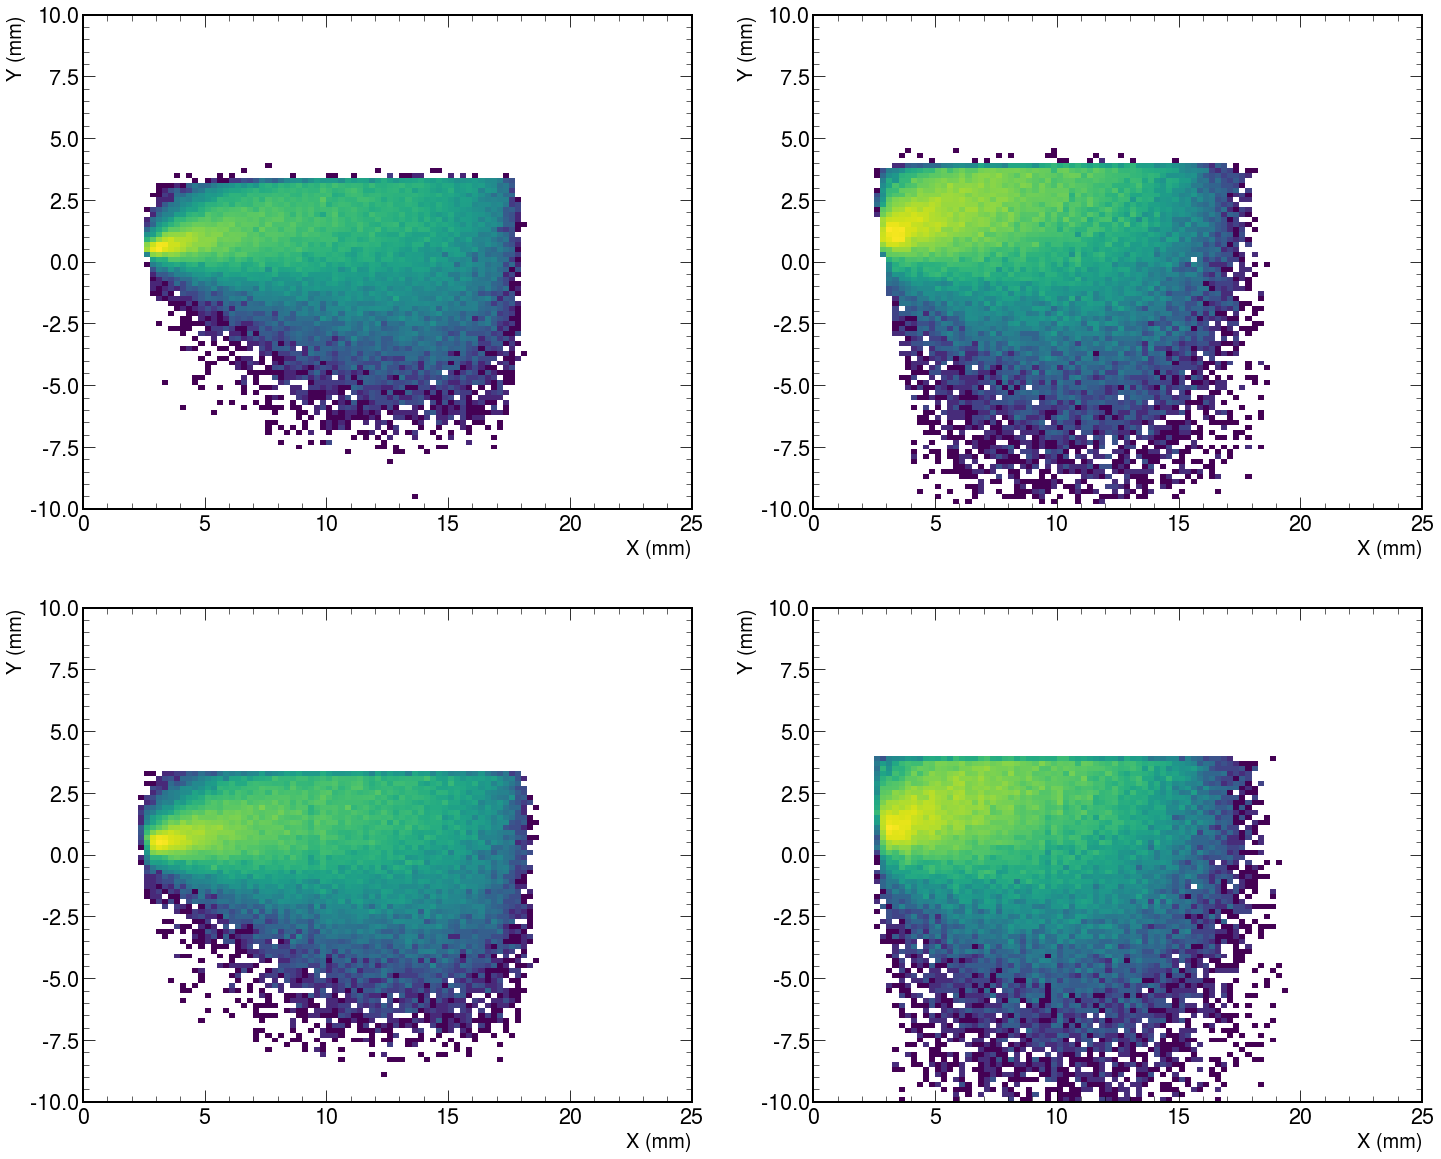

In [43]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk1 ], df_protons_multiRP_data_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk2 ], df_protons_multiRP_data_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk1 ], df_protons_multiRP_data_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk2 ], df_protons_multiRP_data_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )
if save_figures:
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.png", bbox_inches='tight' )

83142 83142


/tmp/ipykernel_533/2321546698.py:12: RuntimeWarning: invalid value encountered in true_divide
  axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
/tmp/ipykernel_533/2321546698.py:18: RuntimeWarning: invalid value encountered in true_divide
  axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )


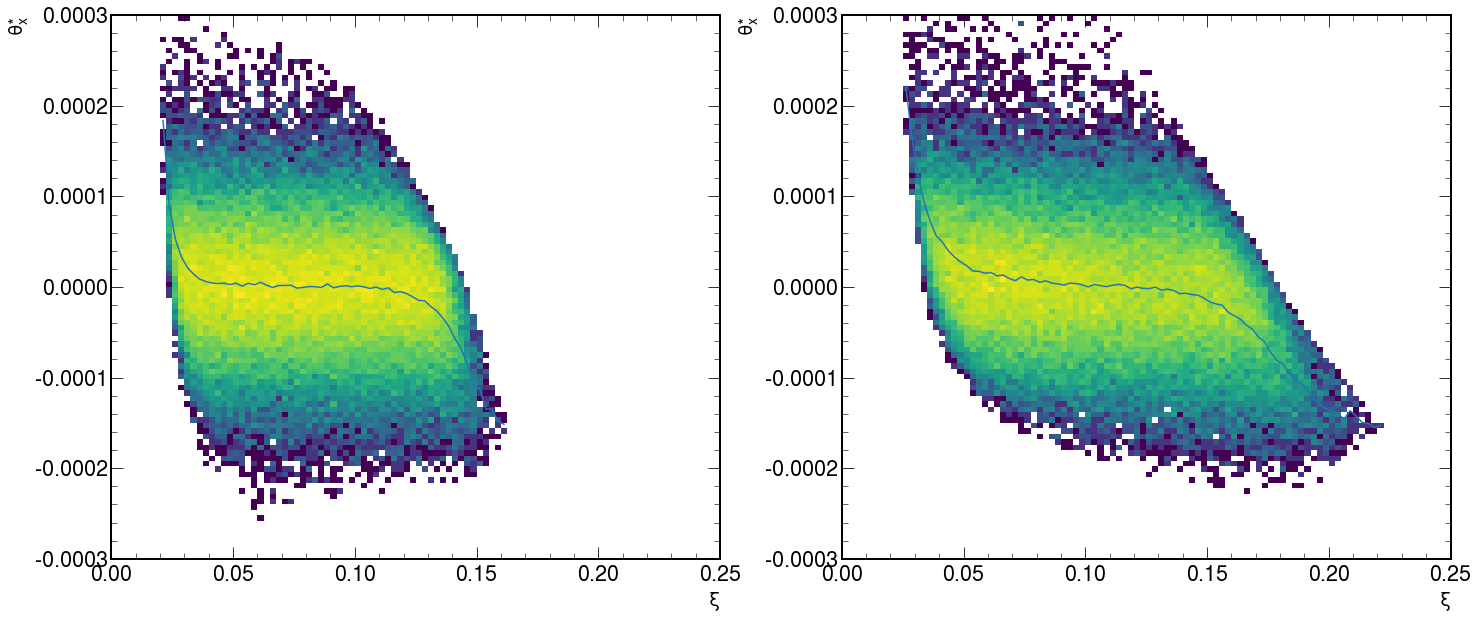

In [44]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk1 ], df_protons_multiRP_data_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk2 ], df_protons_multiRP_data_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
if save_figures:
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.pdf", bbox_inches='tight' )
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.png", bbox_inches='tight' )

In [45]:
msk_data = ( ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] >= 50.0 ) & ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] <= 110.0 ) )
df_protons_multiRP_data_events = df_protons_multiRP_data_events.loc[ msk_data ]

In [46]:
msk_data_cut1 = ( np.abs( df_protons_multiRP_data_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_data_cut2 = ( np.abs( df_protons_multiRP_data_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_data_A =  msk_data_cut1 &  msk_data_cut2
msk_data_B = ~msk_data_cut1 &  msk_data_cut2
msk_data_C =  msk_data_cut1 & ~msk_data_cut2
msk_data_D = ~msk_data_cut1 & ~msk_data_cut2
msk_data = ~msk_data_A

NameError: name 'n_events_bkg_B' is not defined

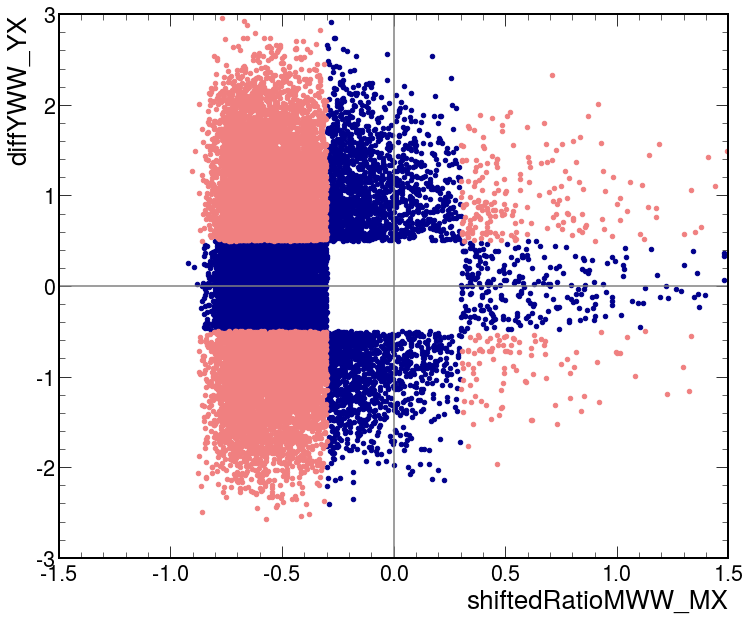

In [47]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_data_events[ msk_data_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_data_B = df_protons_multiRP_data_events[ msk_data_B ].shape[0]
n_events_data_C = df_protons_multiRP_data_events[ msk_data_C ].shape[0]
n_events_data_D = df_protons_multiRP_data_events[ msk_data_D ].shape[0]
resample_factor = 20
print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B / resample_factor ) ) ) )
print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C / resample_factor ) ) ) )
print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D / resample_factor ) ) ) )

### References